## 00. 기타 - 테스트와 버전 확인 등 (01번부터 보세요)

In [18]:
# Gensim에서 제공하는 corpus로 LdaSeqModel 테스트.
from gensim.test.utils import common_corpus
from gensim.models import LdaSeqModel

ldaseq = LdaSeqModel(corpus=common_corpus, time_slice=[2, 4, 3], num_topics=2, chunksize=1)

ModuleNotFoundError: No module named 'gensim'

In [63]:
# 버전 확인 - LDAvis 등
pip freeze

- @ file:///C:/ci/numpy_and_numpy_base_1603466732592/work
-eautifulsoup4 @ file:///tmp/build/80754af9/beautifulsoup4_1601924105527/work
-umpy @ file:///C:/ci/numpy_and_numpy_base_1603466732592/work
alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.10.0
anaconda-project==0.8.3
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1596828585465/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid @ file:///C:/ci/astroid_1592487315634/work
astropy==4.0.2
async-generator==1.10
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1604765588209/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1596578164842/work
Babel @ file:///tmp/build/80754af9/babel_1605108370292/work
backcall==0.2.0
backports.functools-lru-cache==1.6.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
bcrypt @ file:///C:/ci/bcrypt_1597936263757/work
beautifulsoup4==4.6.0
bitarray @ file:///C:/ci/bitarray_1605065210072/work
bk

In [4]:
print(common_corpus)

[[(0, 1), (1, 1), (2, 1)], [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(2, 1), (5, 1), (7, 1), (8, 1)], [(1, 1), (5, 2), (8, 1)], [(3, 1), (6, 1), (7, 1)], [(9, 1)], [(9, 1), (10, 1)], [(9, 1), (10, 1), (11, 1)], [(4, 1), (10, 1), (11, 1)]]


## 01. 파일 읽어와, 기본적인 전처리

In [49]:
# 엑셀 파일 읽어오기
import pandas as pd
import numpy as np
df = pd.read_excel('nbs_final_0218_timeslice.xlsx')
df

ModuleNotFoundError: No module named 'pandas'

In [2]:
uniqueyears, time_slices = np.unique(df.time_slice, return_counts=True)
print(uniqueyears, time_slices)

[2003 2006 2007 2009 2010 2012 2014 2015 2016 2017 2018 2019 2020 2021
 2022] [  1   1   1   1   1   2   5   7  21  51  75 123 263 487  22]


In [20]:
# 초록이 없는 것 조회
df[df['Abstract'].isnull()]

Title  time_slice Abstract  \
19   Nature-based solutions for the contemporary ci...        2016      NaN   
91   The qualities of natural environments that sup...        2018      NaN   
92   Forests as nature-based solutions for ensuring...        2018      NaN   
554  Pragmatic Use of Planetary Health and Nature-B...        2021      NaN   
555  Nature-based solutions can help cool the plane...        2021      NaN   

                                       Author Keywords  \
19                                                 NaN   
91   Blue care; Evidence-based design; Green care; ...   
92                                                 NaN   
554  COVID-19; emergency preparedness; environmenta...   
555       Biodiversity; Climate change; Sustainability   

                                        Index Keywords  
19   adaptive management; climate change; ecosystem...  
91   data quality; environmental restoration; green...  
92                                                 NaN  
554  global health; human; pandemic; COVID-19; Glob...  
555  carbon dioxide; agriculture; animal; atmospher...

In [21]:
# 초록이 없는 것 제거
list_drop = [19, 91, 92, 554, 555]
df_drop = df.drop(list_drop)
df_drop

Title  time_slice  \
0     Local management of global values: Community-b...        2003   
1     Gap formation in Danish beech (Fagus sylvatica...        2006   
2     An integrated wastewater treatment and reuse c...        2007   
3     First-movers, non-movers, and social gains fro...        2009   
4     Fascinating remoteness: The dilemma of hiking ...        2010   
...                                                 ...         ...   
1056  Harnessing spatial nutrient distribution and f...        2022   
1057  Linking plant-root exudate changes to micropol...        2022   
1058  Nature-based solutions, mental health, well-be...        2022   
1059  Approaches to cost-effectiveness of payments f...        2022   
1060  Urban area and nature-based solution: Is this ...        2022   

                                               Abstract  \
0     Community-based natural resources management (...   
1     Soil moisture content (0–90 cm depth) and nitr...   
2     In a Sino-German research project, a joined de...   
3     The importance of ecosystem services for manki...   
4     Remote areas devoid of roads and tourist trans...   
...                                                 ...   
1056  Planting engineer species is widely used to re...   
1057  Recent findings indicate that plant-root exuda...   
1058  Given that the polluted environment affects hu...   
1059  The evaluation of the cost-effectiveness of Pa...   
1060  Finding solutions for the careful management o...   

                                        Author Keywords  \
0     Community; Conservation; Natural resources man...   
1     Drainage fluxes; Fagus sylvatica L; Gaps; Nitr...   
2     Eutrophication control; Metal oxide adsorption...   
3     Ecosystem services; Fixed supply; Payment for ...   
4     hiking tourism; landscape preferences; natural...   
...                                                 ...   
1056  Ammophila arenaria; Clonal plant; Interaction;...   
1057  Aquatic-plants; Exudates; GC non-Target; Metab...   
1058  Green brand (GB) attitude; Green brand evangel...   
1059  Conceptual framework; Cost-effectiveness metri...   
1060  Generation Z; sustainability; sustainable tour...   

                                         Index Keywords  
0     biodiversity; local participation; nature cons...  
1                                Fagus; Fagus sylvatica  
2     Adsorption towers; Bioreactors; Energy efficie...  
3     cost-benefit analysis; ecosystem service; mark...  
4     cultural landscape; ecotourism; mountain regio...  
...                                                 ...  
1056  Fertilizers; Nutrients; Plants (botany); Resto...  
1057  Amides; Biodegradation; Discriminant analysis;...  
1058                                                NaN  
1059                                                NaN  
1060                                                NaN  

[1056 rows x 5 columns]

In [5]:
# 요약문의 형식을 살피기
df_drop.Abstract[11]

'This article draws on different bodies of knowledge in order to review the potential role of outdoor education in providing nature-based experiences that might contribute to sustainable living A pragmatic perspective is adopted to critique what outdoor education is,and then what it might be. Phenomenology is used to challenge the belief that there is a causal relationship between activities and learning outcomes but foremost to consider what it is to be in nature in the first place. Aspects of both realism and social constructionism are presented as essential to environmental philosophy and the concomitant, but contested, relationship between people and planet. Through these multiple realities the moral significance of nature emerges not only as a theoretical consideration but as a practical one too. In this way I challenge dualisms that provide stumbling blocks to practice and celebrate instead pluralistic thinking where starting points are based on real-life work settings where theo

In [6]:
# 요약문에서 실제로 내용이 있는 부분('@' 앞)만을 가져와, 새 컬럼 Abs_split에 저장
abs_split = df_drop['Abstract'].str.split('©')
df_drop['Abs_split'] = abs_split.str.get(0)
df_drop

Title  time_slice  \
0     Local management of global values: Community-b...        2003   
1     Gap formation in Danish beech (Fagus sylvatica...        2006   
2     An integrated wastewater treatment and reuse c...        2007   
3     First-movers, non-movers, and social gains fro...        2009   
4     Fascinating remoteness: The dilemma of hiking ...        2010   
...                                                 ...         ...   
1056  Harnessing spatial nutrient distribution and f...        2022   
1057  Linking plant-root exudate changes to micropol...        2022   
1058  Nature-based solutions, mental health, well-be...        2022   
1059  Approaches to cost-effectiveness of payments f...        2022   
1060  Urban area and nature-based solution: Is this ...        2022   

                                               Abstract  \
0     Community-based natural resources management (...   
1     Soil moisture content (0–90 cm depth) and nitr...   
2     In a Sino-German research project, a joined de...   
3     The importance of ecosystem services for manki...   
4     Remote areas devoid of roads and tourist trans...   
...                                                 ...   
1056  Planting engineer species is widely used to re...   
1057  Recent findings indicate that plant-root exuda...   
1058  Given that the polluted environment affects hu...   
1059  The evaluation of the cost-effectiveness of Pa...   
1060  Finding solutions for the careful management o...   

                                        Author Keywords  \
0     Community; Conservation; Natural resources man...   
1     Drainage fluxes; Fagus sylvatica L; Gaps; Nitr...   
2     Eutrophication control; Metal oxide adsorption...   
3     Ecosystem services; Fixed supply; Payment for ...   
4     hiking tourism; landscape preferences; natural...   
...                                                 ...   
1056  Ammophila arenaria; Clonal plant; Interaction;...   
1057  Aquatic-plants; Exudates; GC non-Target; Metab...   
1058  Green brand (GB) attitude; Green brand evangel...   
1059  Conceptual framework; Cost-effectiveness metri...   
1060  Generation Z; sustainability; sustainable tour...   

                                         Index Keywords  \
0     biodiversity; local participation; nature cons...   
1                                Fagus; Fagus sylvatica   
2     Adsorption towers; Bioreactors; Energy efficie...   
3     cost-benefit analysis; ecosystem service; mark...   
4     cultural landscape; ecotourism; mountain regio...   
...                                                 ...   
1056  Fertilizers; Nutrients; Plants (botany); Resto...   
1057  Amides; Biodegradation; Discriminant analysis;...   
1058                                                NaN   
1059                                                NaN   
1060                                                NaN   

                                              Abs_split  
0     Community-based natural resources management (...  
1     Soil moisture content (0–90 cm depth) and nitr...  
2     In a Sino-German research project, a joined de...  
3     The importance of ecosystem services for manki...  
4     Remote areas devoid of roads and tourist trans...  
...                                                 ...  
1056  Planting engineer species is widely used to re...  
1057  Recent findings indicate that plant-root exuda...  
1058  Given that the polluted environment affects hu...  
1059  The evaluation of the cost-effectiveness of Pa...  
1060  Finding solutions for the careful management o...  

[1056 rows x 6 columns]

In [7]:
# 새 컬럼 Abs_split에 저장된 것 중 11번째(0부터니 12번째) 것 조회
df_drop.Abs_split[11]

'This article draws on different bodies of knowledge in order to review the potential role of outdoor education in providing nature-based experiences that might contribute to sustainable living A pragmatic perspective is adopted to critique what outdoor education is,and then what it might be. Phenomenology is used to challenge the belief that there is a causal relationship between activities and learning outcomes but foremost to consider what it is to be in nature in the first place. Aspects of both realism and social constructionism are presented as essential to environmental philosophy and the concomitant, but contested, relationship between people and planet. Through these multiple realities the moral significance of nature emerges not only as a theoretical consideration but as a practical one too. In this way I challenge dualisms that provide stumbling blocks to practice and celebrate instead pluralistic thinking where starting points are based on real-life work settings where theo

In [8]:
# 초록과 저자키워드 있는 것 -> 새로운 컬럼 abs+key에 합치기
df_drop["abs+key"] = df_drop["Abs_split"] + " " + df_drop["Author Keywords"]
#df["abs+key"] = df["Abs_split"] + " " + df["Author Keywords"]

# 초록만 있는 것 -> abs+key에 초록을 가져오기
df_drop["abs+key"] = df_drop["abs+key"].fillna(df_drop["Abs_split"])
df_drop

Title  time_slice  \
0     Local management of global values: Community-b...        2003   
1     Gap formation in Danish beech (Fagus sylvatica...        2006   
2     An integrated wastewater treatment and reuse c...        2007   
3     First-movers, non-movers, and social gains fro...        2009   
4     Fascinating remoteness: The dilemma of hiking ...        2010   
...                                                 ...         ...   
1056  Harnessing spatial nutrient distribution and f...        2022   
1057  Linking plant-root exudate changes to micropol...        2022   
1058  Nature-based solutions, mental health, well-be...        2022   
1059  Approaches to cost-effectiveness of payments f...        2022   
1060  Urban area and nature-based solution: Is this ...        2022   

                                               Abstract  \
0     Community-based natural resources management (...   
1     Soil moisture content (0–90 cm depth) and nitr...   
2     In a Sino-German research project, a joined de...   
3     The importance of ecosystem services for manki...   
4     Remote areas devoid of roads and tourist trans...   
...                                                 ...   
1056  Planting engineer species is widely used to re...   
1057  Recent findings indicate that plant-root exuda...   
1058  Given that the polluted environment affects hu...   
1059  The evaluation of the cost-effectiveness of Pa...   
1060  Finding solutions for the careful management o...   

                                        Author Keywords  \
0     Community; Conservation; Natural resources man...   
1     Drainage fluxes; Fagus sylvatica L; Gaps; Nitr...   
2     Eutrophication control; Metal oxide adsorption...   
3     Ecosystem services; Fixed supply; Payment for ...   
4     hiking tourism; landscape preferences; natural...   
...                                                 ...   
1056  Ammophila arenaria; Clonal plant; Interaction;...   
1057  Aquatic-plants; Exudates; GC non-Target; Metab...   
1058  Green brand (GB) attitude; Green brand evangel...   
1059  Conceptual framework; Cost-effectiveness metri...   
1060  Generation Z; sustainability; sustainable tour...   

                                         Index Keywords  \
0     biodiversity; local participation; nature cons...   
1                                Fagus; Fagus sylvatica   
2     Adsorption towers; Bioreactors; Energy efficie...   
3     cost-benefit analysis; ecosystem service; mark...   
4     cultural landscape; ecotourism; mountain regio...   
...                                                 ...   
1056  Fertilizers; Nutrients; Plants (botany); Resto...   
1057  Amides; Biodegradation; Discriminant analysis;...   
1058                                                NaN   
1059                                                NaN   
1060                                                NaN   

                                              Abs_split  \
0     Community-based natural resources management (...   
1     Soil moisture content (0–90 cm depth) and nitr...   
2     In a Sino-German research project, a joined de...   
3     The importance of ecosystem services for manki...   
4     Remote areas devoid of roads and tourist trans...   
...                                                 ...   
1056  Planting engineer species is widely used to re...   
1057  Recent findings indicate that plant-root exuda...   
1058  Given that the polluted environment affects hu...   
1059  The evaluation of the cost-effectiveness of Pa...   
1060  Finding solutions for the careful management o...   

                                                abs+key  
0     Community-based natural resources management (...  
1     Soil moisture content (0–90 cm depth) and nitr...  
2     In a Sino-German research project, a joined de...  
3     The importance of ecosystem services for manki...  
4     Remote areas devoid of roads and tourist trans...  
...          

In [9]:
# abs+key 컬럼 조회
df_drop['abs+key'][21]

'Rapid global urbanization has led to a series of issues such as climate change and sea-level rise. The solution to such problems ultimately comes down to resolution of the conflict between man and nature. The philosophy of ancient China and the West presented a na-ve holistic description of the relationship between humans and nature, and whereas the reductionism-centric approach of modern Western science has been unable to solve the real-world complexities. Cities, which can be considered as giant complex open systems, wherein the entire range of human nature can be founds, are places facing many problems. Urban development is a natural-adaptive evolutionary process. Introduction of complex adaptive systems in urban planning, combined with the seven basic characteristics of complex adaptive systems, divides the complex city system into physical subsystem and non-physical subsystem. We discuss the relationship between adaptive agents, the complexity of adaptive agent, and adaptation me

In [10]:
# 필요없는 컬럼은 drop으로 버리고, 남은 깔끔한 표만 출력
df_neat = df_drop.drop(['Abstract', 'Author Keywords', 'Index Keywords', 'Abs_split'], axis = 1)
# df_neat = df.drop(['Abstract', 'Author Keywords', 'Index Keywords', 'Abs_split'], axis = 1)
df_neat

Title  time_slice  \
0     Local management of global values: Community-b...        2003   
1     Gap formation in Danish beech (Fagus sylvatica...        2006   
2     An integrated wastewater treatment and reuse c...        2007   
3     First-movers, non-movers, and social gains fro...        2009   
4     Fascinating remoteness: The dilemma of hiking ...        2010   
...                                                 ...         ...   
1056  Harnessing spatial nutrient distribution and f...        2022   
1057  Linking plant-root exudate changes to micropol...        2022   
1058  Nature-based solutions, mental health, well-be...        2022   
1059  Approaches to cost-effectiveness of payments f...        2022   
1060  Urban area and nature-based solution: Is this ...        2022   

                                                abs+key  
0     Community-based natural resources management (...  
1     Soil moisture content (0–90 cm depth) and nitr...  
2     In a Sino-German research project, a joined de...  
3     The importance of ecosystem services for manki...  
4     Remote areas devoid of roads and tourist trans...  
...                                                 ...  
1056  Planting engineer species is widely used to re...  
1057  Recent findings indicate that plant-root exuda...  
1058  Given that the polluted environment affects hu...  
1059  The evaluation of the cost-effectiveness of Pa...  
1060  Finding solutions for the careful management o...  

[1056 rows x 3 columns]

## 02. 영문 형태소 분석 (using nltk)

In [11]:
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('[\w]+')

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
stop_words = stopwords.words('english')
l_stemmer = LancasterStemmer()
p_stemmer = PorterStemmer()

In [14]:
# 원하는 불용어 반영
stop_words.extend(['nature', 'based', 'solutions', 'nbs', 'studing', 'studies', 'study', '0', '1', '2', '3', '4', '5', '6',
                   '7', '8', '9', '30', 'management', 'manage', 'model', 'models', 'use', 'used', 'uses',
                   'plan', 'plans', 'planned', 'increase', 'increased', 'increases',
                   'service', 'services', 'result', 'results', 'resulted', 'system', 'systems', 'implement', 'implements',
                   'implementation', 'treat', 'treatment', 'treated', 'treats',
                   'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'mg', 'n', 'o', 'p', 'q',
                   'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
# abs+key 컬럼을 list 형식으로 저장
list_from_df = df_neat['abs+key'].values.tolist()
list_from_df
#print(len(list_from_df))

['Community-based natural resources management (CBNRM) is being increasingly promoted as the solution to problems of nature conservation, and some national programs like the Zimbabwean CAMPFIRE and Zambian ADMADE1 have been championed as models for others to imitate. The approach seeks to fuse two very different kinds of agendas-preservation of nature based on biocentric premises, and decentralized rural development based on anthropocentric premises-into a win-win combination. However, as the implementation strategy relies on pragmatic reasoning, where economic rationality constitutes the main criterion, it fails to take into account the various noneconomic values involved. While individual success stories are on record, the experience this far does not provide replicable models for either decentralized resource management or efficient conservation of biodiversity. Community; Conservation; Natural resources management; Southern Africa',
 'Soil moisture content (0–90 cm depth) and nitra

In [16]:
# 이 셀은 테스트용임 - 불용어에 해당 안 되는 단어들 대상으로, 적절히 형태소 분석 하는지 검토

a = ['Community-based natural resources management (CBNRM) is being increasingly promoted as the solution to problems of nature conservation, and some national programs like the Zimbabwean CAMPFIRE and Zambian ADMADE1 have been championed as models for others to imitate. The approach seeks to fuse two very different kinds of agendas-preservation of nature based on biocentric premises, and decentralized rural development based on anthropocentric premises-into a win-win combination. However, as the implementation strategy relies on pragmatic reasoning, where economic rationality constitutes the main criterion, it fails to take into account the various noneconomic values involved. While individual success stories are on record, the experience this far does not provide replicable models for either decentralized resource management or efficient conservation of biodiversity. Community; Conservation; Natural resources management; Southern Africa']
for w in a: 
    raw = w.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in stop_words]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)
print(stopped_tokens)
print(stemmed_tokens)

NameError: name 'texts' is not defined

In [22]:
# 형태소 분석 -> tests라는 리스트에 저장
texts = []

for w in list_from_df:
    raw = w.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in stop_words]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)
    print(stopped_tokens)
    print(stemmed_tokens)
#print(stopped_tokens)
#print(stemmed_tokens)

'''for w in list_from_df:
    raw = w.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in stop_words]
    stemmed_tokens = [l_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)
print(stopped_tokens)
print(stemmed_tokens)'''

['community', 'natural', 'resources', 'cbnrm', 'increasingly', 'promoted', 'solution', 'problems', 'conservation', 'national', 'programs', 'like', 'zimbabwean', 'campfire', 'zambian', 'admade1', 'championed', 'others', 'imitate', 'approach', 'seeks', 'fuse', 'two', 'different', 'kinds', 'agendas', 'preservation', 'biocentric', 'premises', 'decentralized', 'rural', 'development', 'anthropocentric', 'premises', 'win', 'win', 'combination', 'however', 'strategy', 'relies', 'pragmatic', 'reasoning', 'economic', 'rationality', 'constitutes', 'main', 'criterion', 'fails', 'take', 'account', 'various', 'noneconomic', 'values', 'involved', 'individual', 'success', 'stories', 'record', 'experience', 'far', 'provide', 'replicable', 'either', 'decentralized', 'resource', 'efficient', 'conservation', 'biodiversity', 'community', 'conservation', 'natural', 'resources', 'southern', 'africa']
['commun', 'natur', 'resourc', 'cbnrm', 'increasingli', 'promot', 'solut', 'problem', 'conserv', 'nation', 'p

['water', 'particular', 'importance', 'cities', 'many', 'fast', 'growing', 'megacities', 'facing', 'serious', 'water', 'related', 'problems', 'including', 'pollution', 'eutrophication', 'missing', 'wastewater', 'perhaps', 'importantly', 'severe', 'scarcity', 'clean', 'water', 'entire', 'urban', 'world', 'water', 'resources', 'inefficient', 'way', 'great', 'potential', 'opinion', 'paper', 'discusses', 'ecosystem', 'provided', 'waters', 'hereafter', 'referred', 'blue', 'urban', 'ecosystem', 'respective', 'links', 'green', 'infrastructure', 'provide', 'human', 'wellbeing', 'messages', 'given', 'illustrate', 'avenues', 'future', 'research', 'might', 'help', 'develop', 'water', 'related', 'challenges', 'urban', 'regions', 'blue', 'green', 'infrastructure', 'cities', 'ecosystem', 'urban', 'waters']
['water', 'particular', 'import', 'citi', 'mani', 'fast', 'grow', 'megac', 'face', 'seriou', 'water', 'relat', 'problem', 'includ', 'pollut', 'eutroph', 'miss', 'wastewat', 'perhap', 'importantli'

['sustainable', 'tourism', 'brought', 'public', 'attention', 'solution', 'problem', 'economic', 'diversification', 'central', 'eastern', 'european', 'cee', 'communities', 'included', 'european', 'ecological', 'network', 'n2000', 'however', 'natura', '2000', 'tourism', 'development', 'yet', 'proven', 'effective', 'way', 'boost', 'local', 'economies', 'notion', 'sustainable', 'tourism', 'natura', '2000', 'resources', 'challenged', 'residents', 'cee', 'communities', 'goal', 'explore', 'issues', 'concerning', 'natura', '2000', 'tourism', 'perspective', 'local', 'residents', 'within', 'three', 'municipalities', 'małopolska', 'poland', 'determine', 'natura', '2000', 'perceived', 'local', 'residents', 'valuable', 'tourism', 'asset', 'employed', 'mix', 'mode', 'methodology', 'depth', 'interview', 'public', 'participation', 'gis', 'mapping', 'task', 'highlight', 'several', 'areas', 'concern', 'regarding', 'resident', 'perspectives', 'natura', '2000', 'tourism', 'first', 'misconception', 'reside

['seagrass', 'global', 'distribution', 'declined', 'last', 'decades', 'due', 'many', 'causes', 'recovery', 'programmes', 'well', 'development', 'new', 'restoration', 'techniques', 'needed', 'work', 'describes', 'development', 'innovative', 'restoration', 'measure', 'enhance', 'zostera', 'marina', 'eelgrass', 'seed', 'germination', 'seedling', 'survival', 'sediments', 'inhabited', 'lugworms', 'arenicola', 'marina', 'validation', 'mesocosm', 'experiments', 'technique', 'consists', 'placing', 'cm', 'thick', 'biodegradable', 'coconut', 'fibre', 'mats', 'membrane', 'surface', 'sediment', 'exclude', 'negative', 'effects', 'sediment', 'reworking', 'burial', 'seeds', 'destabilization', 'burial', 'seedlings', 'two', 'different', 'flume', 'mesocosm', 'experiments', 'setup', 'test', 'effect', 'membranes', 'burial', 'marina', 'seeds', 'ii', 'effect', 'membranes', 'survival', 'growth', 'marina', 'seedlings', 'experiments', 'run', '10', 'weeks', 'respectively', 'show', 'membrane', 'effectively', 'pr

['aerosols', 'affect', 'insolation', 'ground', 'thus', 'aerosol', 'optical', 'depth', 'aod', 'measure', 'aerosol', 'pollution', 'plays', 'important', 'role', 'variation', 'physiological', 'equivalent', 'temperature', 'pet', 'locations', 'different', 'aerosol', 'climatology', 'aerosol', 'effects', 'upon', 'pet', 'studied', 'first', 'time', 'four', 'east', 'asian', 'cities', 'coupling', 'radiative', 'transfer', 'human', 'thermal', 'comfort', 'previously', 'well', 'evaluated', 'evident', 'modis', 'aeronet', 'aod', 'observations', 'aerosol', 'pollution', 'beijing', 'seoul', 'higher', 'chiayi', 'taiwan', 'hong', 'kong', 'aeronet', 'data', 'background', 'aod', 'levels', 'selected', 'temperate', 'cities', 'similar', 'clear', 'sky', 'pet', 'values', 'especially', 'summertime', 'due', 'locations', 'similar', 'latitudes', 'also', 'applied', 'sub', 'tropical', 'cities', 'aod', 'level', 'seasonal', 'average', 'one', 'led', 'diffuse', 'solar', 'radiation', 'turn', 'pet', 'people', 'living', 'cities

['algal', 'blooms', 'become', 'pressing', 'issue', 'inland', 'freshwater', 'local', 'global', 'scales', 'plausible', 'approach', 'reducing', 'algae', 'without', 'chemical', 'biological', 'agents', 'uv', 'radiation', 'lamps', 'potentially', 'powered', 'situ', 'solar', 'panels', 'eliminate', 'algae', 'yet', 'quantitative', 'scientific', 'base', 'established', 'objective', 'conduct', 'controlled', 'experiment', 'quantify', 'effectiveness', 'uv', 'radiation', 'reduction', 'chlorella', 'vulgaris', 'common', 'algal', 'species', 'great', 'lakes', 'region', 'full', 'factorial', 'design', 'three', 'intensities', 'uv', 'radiation', '15', 'three', 'sources', 'vulgaris', 'constructed', 'test', 'corresponding', 'hypotheses', 'empirical', 'constructed', 'predict', 'reductions', 'uv', 'radiation', 'effectively', 'reduced', 'algal', 'concentration', 'clear', 'differences', 'radiation', 'level', 'source', 'algal', 'water', 'algal', 'concentration', 'decreased', 'exponentially', 'time', 'distinct', 'dec

['human', 'degradation', 'coastal', 'ecosystems', 'time', 'high', 'thus', 'current', 'challenge', 'environmental', 'research', 'moving', 'beyond', 'ecological', 'definitions', 'success', 'integrating', 'socioeconomic', 'factors', 'projects', 'aim', 'however', 'focused', 'primarily', 'monetary', 'valuations', 'ecosystem', 'functions', 'overlooking', 'behaviors', 'psycho', 'social', 'motivations', 'environmental', 'using', 'salt', 'marsh', 'restoration', 'project', 'martha', 'vineyard', 'massachusetts', 'assess', 'role', 'human', 'attitudes', 'preferences', 'evaluating', 'social', 'success', 'ecosystem', 'structural', 'equation', 'modeling', 'compare', 'strengths', 'social', 'variables', 'predicting', 'restoration', 'project', 'support', 'find', 'public', 'understanding', 'important', 'predictor', 'personal', 'values', 'show', 'even', 'among', 'stakeholders', 'strong', 'pro', 'environmental', 'values', 'weak', 'understanding', 'initiative', 'undermine', 'support', 'also', 'find', 'projec

['due', 'poorly', 'anthropogenic', 'activities', 'water', 'quality', 'several', 'asian', 'big', 'rivers', 'highly', 'affected', 'although', 'assessment', 'heavy', 'metal', 'contents', 'vital', 'develop', 'design', 'sustainable', 'water', 'several', 'areas', 'central', 'asia', 'kazakhstan', 'recent', 'available', 'evaluate', 'situation', 'one', 'representative', 'example', 'lack', 'information', 'syr', 'darya', 'river', 'thus', 'carried', 'first', 'approach', 'water', 'quality', 'assessment', 'kazakhstan', 'syr', 'darya', 'river', 'massive', 'expansion', 'irrigation', 'canals', 'pastures', 'middle', 'lower', 'reaches', 'industrialization', 'population', 'lowered', 'potential', 'water', 'capacity', 'achieve', 'goal', 'various', 'physicochemical', 'parameters', 'analyzed', 'forty', 'three', 'water', 'samples', 'along', 'river', 'dry', 'weather', 'conditions', '25', 'cm', 'water', 'depth', 'obtained', 'analyzed', 'using', 'standard', 'methods', 'multi', '2100', 'analyzer', 'atomic', 'absor

['considering', 'potential', 'wetlands', 'dampen', 'temporal', 'variability', 'water', 'flow', 'landscape', 'increasingly', 'considered', 'possible', 'mitigate', 'risks', 'flooding', 'drought', 'investigate', 'flow', 'variability', 'means', 'flow', 'dampening', 'factor', 'observation', 'data', '1984', '2013', '82', 'swedish', 'catchments', 'statistically', 'comparatively', 'analyze', 'large', 'scale', 'effects', 'factor', 'multiple', 'wetlands', 'lakes', 'landscape', 'show', 'good', 'correlation', 'large', 'scale', 'flow', 'dampening', 'relative', 'area', 'lakes', 'floodplain', 'wetlands', 'within', 'catchment', 'relative', 'area', 'around', '15', 'lakes', 'floodplain', 'wetlands', 'lowers', 'temporal', 'standard', 'deviation', 'runoff', 'around', '10', '15', 'precipitation', 'compared', 'common', 'flow', 'variability', 'dampening', 'around', '35', 'catchments', 'lake', 'wetland', 'area', 'close', 'zero', 'relative', 'areas', 'wetland', 'types', 'floodplain', 'wetlands', 'little', 'flo

['urbanization', 'process', 'rapidly', 'converting', 'forested', 'areas', 'grasslands', 'residential', 'commercial', 'industrial', 'spaces', 'triggering', 'soil', 'degradation', 'significantly', 'increasing', 'impervious', 'surfaces', 'consequently', 'man', 'made', 'environments', 'experience', 'significant', 'decrease', 'infiltration', 'groundwater', 'recharge', 'enhancing', 'problems', 'related', 'protection', 'stormwater', 'runoff', 'green', 'roofs', 'structural', 'measures', 'able', 'mitigate', 'negative', 'drawbacks', 'due', 'anthropic', 'transformation', 'retaining', 'detaining', 'stormwater', 'runoff', 'main', 'advantage', 'reducing', 'hydraulic', 'loads', 'combined', 'storm', 'sewer', 'hydrological', 'performance', 'green', 'roofs', 'studied', 'different', 'parts', 'world', 'different', 'climatic', 'conditions', 'comprehensive', 'provides', 'global', 'responses', 'even', 'approximate', 'way', 'still', 'missing', 'aim', 'work', 'assess', 'convenience', 'feasibility', 'installing

['ecosystem', 'planning', 'approaches', 'increasingly', 'promoted', 'international', 'national', 'policies', 'municipalities', 'still', 'struggling', 'translating', 'practice', 'background', 'paper', 'aims', 'knowledge', 'current', 'advances', 'possible', 'ways', 'support', 'ecosystem', 'es', 'approach', 'municipal', 'level', 'specifically', 'analyze', 'es', 'integrated', 'comprehensive', 'planning', 'within', 'municipality', 'malmö', 'sweden', 'last', '60', 'years', 'declared', 'forerunner', 'local', 'environmental', 'governance', 'content', 'analysis', 'comprehensive', 'period', '1956', '2014', 'interviews', 'municipal', 'stakeholders', 'paper', 'demonstrates', 'planning', 'shifted', 'time', 'toward', 'holistic', 'view', 'es', 'significance', 'human', 'well', 'urban', 'sustainability', 'explicit', 'implicit', 'applications', 'es', 'concept', 'found', 'analyzed', 'comprehensive', 'associated', 'programs', 'projects', 'shows', 'applications', 'reflect', 'international', 'national', 'lo

['high', 'percentage', 'urban', 'areas', 'covered', 'impermeable', 'surfaces', 'reduce', 'infiltration', 'landscape', 'retention', 'stormwater', 'moreover', 'pollution', 'flushed', 'areas', 'particularly', 'intensive', 'rainfall', 'often', 'drained', 'directly', 'rivers', 'reservoirs', 'many', 'cases', 'also', 'serve', 'recreational', 'function', 'cities', 'stormwater', 'runoff', 'contributes', 'degradation', 'aquatic', 'ecosystems', 'intensified', 'eutrophication', 'growing', 'seasons', 'toxic', 'cyanobacterial', 'blooms', 'hybrid', 'combined', 'engineering', 'biological', 'measures', 'tested', 'research', 'constructed', '2013', 'łódź', 'city', 'polnad', 'retain', 'purify', 'stormwater', 'runoff', 'street', 'runed', 'directly', 'cascade', 'recreational', 'reservoirs', 'hybrid', 'consists', 'underground', 'separators', 'combined', 'sequential', 'sedimentation', 'biofiltration', 'ssbs', 'first', 'two', 'years', 'operation', 'effectively', 'reduced', 'pollution', 'transported', 'urban', 

['imperative', 'worldwide', 'need', 'identify', 'effective', 'approaches', 'deal', 'water', 'related', 'risks', 'mainly', 'increasingly', 'frequent', 'floods', 'well', 'severe', 'droughts', 'particularly', 'policy', 'decision', 'makers', 'trying', 'identify', 'systemic', 'strategies', 'going', 'beyond', 'mere', 'risk', 'reduction', 'capable', 'deal', 'simultaneously', 'multiple', 'challenges', 'climate', 'resilience', 'health', 'well', 'quality', 'life', 'thus', 'providing', 'additional', 'benefits', 'direction', 'contribution', 'relevant', 'although', 'wider', 'still', 'hampered', 'several', 'barriers', 'uncertainty', 'lack', 'information', 'long', 'term', 'behavior', 'difficulty', 'quantitatively', 'valuing', 'multidimensional', 'impacts', 'activities', 'described', 'present', 'paper', 'carried', 'within', 'eu', 'funded', 'project', 'naiad', 'mainly', 'aim', 'developing', 'participatory', 'dynamic', 'capable', 'quantitatively', 'assess', 'effectiveness', 'deal', 'flood', 'risks', 'pr

['wetland', 'oxbow', 'play', 'fundament', 'socio', 'econom', 'environment', 'role', 'behav', 'effici', 'tool', 'regard', 'hydrolog', 'ecolog', 'concern', 'contribut', 'control', 'river', 'discharg', 'flood', 'prevent', 'contribut', 'drought', 'flow', 'well', 'water', 'qualiti', 'excess', 'nutrient', 'retent', 'constitut', 'refug', 'habitat', 'flora', 'fauna', 'may', 'becom', 'determin', 'near', 'futur', 'howev', 'establish', 'complet', 'reliabl', 'function', 'complic', 'differ', 'connect', 'degre', 'present', 'specif', 'wetland', 'main', 'stream', 'adjunct', 'alluvi', 'aquif', 'moreov', 'monodisciplinari', 'approach', 'usual', 'conduct', 'underestim', 'even', 'neglect', 'sourc', 'water', 'suppli', 'present', 'offer', 'multidisciplinari', 'approach', 'coupl', 'hydrodynam', 'surfac', 'water', 'groundwat', 'level', 'geochem', 'ec', 'ph', 'major', 'ion', 'isotop', 'δ2h', 'δ18o', 'character', 'order', 'properli', 'assess', 'dynam', 'specif', 'hydrosystem', 'abl', 'establish', 'complet', 're

['rewilding', 'increasingly', 'recognized', 'conservation', 'tool', 'often', 'context', 'specific', 'inhibits', 'broad', 'application', 'rewilding', 'australia', 'seeks', 'enhance', 'ecosystem', 'function', 'promote', 'self', 'sustaining', 'ecosystems', 'absence', 'large', 'bodied', 'native', 'herbivores', 'means', 'trophic', 'rewilding', 'mainland', 'australia', 'focused', 'restoration', 'functions', 'provided', 'apex', 'predators', 'small', 'mammals', 'pervasive', 'influence', 'introduced', 'mesopredators', 'predator', 'proof', 'fences', 'establishment', 'populations', 'predator', 'free', 'islands', 'common', 'rewilding', 'approaches', 'sets', 'australian', 'rewilding', 'apart', 'jurisdictions', 'provides', 'globally', 'relevant', 'insights', 'presents', 'challenges', 'restoring', 'function', 'broader', 'landscapes', 'passive', 'rewilding', 'limited', 'utility', 'arid', 'zones', 'although', 'increasing', 'habitat', 'extent', 'quality', 'mesic', 'coastal', 'areas', 'may', 'work', 'lik

['worldwide', 'eutrophication', 'cyanobacteria', 'blooms', 'lakes', 'reservoirs', 'great', 'concern', 'water', 'resources', 'coupling', 'catchment', 'hydrological', 'lake', 'strategy', 'assess', 'impact', 'land', 'agricultural', 'practices', 'climate', 'change', 'water', 'quality', 'however', 'research', 'mainly', 'focused', 'large', 'lakes', 'urban', 'reservoirs', 'catchments', 'especially', 'tropical', 'regions', 'still', 'poorly', 'studied', 'despite', 'wide', 'range', 'ecosystem', 'provide', 'integrated', 'modelling', 'approach', 'coupling', 'hydrological', 'storm', 'water', 'swmm', 'lake', 'ecological', 'dyresm', 'caedym', 'proposed', 'lake', 'pampulha', 'brazil', 'scenarios', 'imperviousness', 'catchment', 'reduction', 'load', 'nutrients', 'total', 'suspended', 'solids', 'tss', 'dry', 'weather', 'inflow', 'simulated', 'runoff', 'water', 'quality', 'simulations', 'presented', 'fair', 'performance', 'tss', 'ammonium', 'nh4', 'dynamics', 'total', 'phosphorus', 'tp', 'nitrate', 'no3'

['proliferating', 'european', 'cities', 'past', 'years', 'viable', 'urban', 'challenges', 'climate', 'change', 'urban', 'degeneration', 'aging', 'infrastructures', 'evidence', 'amounting', 'need', 'translate', 'knowledge', 'future', 'policy', 'planning', 'paper', 'analysed', 'fifteen', 'cases', 'experiments', 'across', '11', 'european', 'cities', 'makes', 'case', 'stand', 'balanced', 'focus', 'ecosystem', 'social', 'benefits', 'contrast', 'many', 'published', 'cases', 'weighted', 'focus', 'climate', 'benefits', 'cross', 'case', 'comparative', 'analysis', 'draw', 'seven', 'overarching', 'lessons', 'related', 'stages', 'proof', 'concept', 'cities', 'need', 'aesthetically', 'appealing', 'citizens', 'create', 'new', 'green', 'urban', 'commons', 'experimenting', 'requires', 'trust', 'local', 'government', 'experimentation', 'process', 'co', 'creation', 'requires', 'diversity', 'learning', 'social', 'innovation', 'require', 'collaborative', 'governance', 'inclusive', 'narrative', 'mission', 

['natural', 'rivers', 'urban', 'areas', 'bear', 'significant', 'potential', 'provide', 'ecosystem', 'surrounding', 'inhabitants', 'however', 'surface', 'sealing', 'houses', 'street', 'networks', 'urban', 'drainage', 'disposal', 'waste', 'wastewater', 'resulting', 'advancing', 'urbanization', 'usually', 'lead', 'deterioration', 'urban', 'rivers', 'riparian', 'areas', 'ultimately', 'damages', 'ability', 'provide', 'ecosystem', 'paper', 'presents', 'innovative', 'methodology', 'rapid', 'low', 'cost', 'assessment', 'ecological', 'status', 'urban', 'rivers', 'riparian', 'areas', 'developing', 'countries', 'data', 'scarce', 'conditions', 'methodology', 'combination', 'field', 'data', 'freely', 'available', 'high', 'resolution', 'satellite', 'images', 'assess', 'three', 'ecological', 'status', 'categories', 'river', 'hydromorphology', 'water', 'quality', 'riparian', 'land', 'cover', 'focus', 'assessment', 'proxies', 'biophysical', 'structures', 'processes', 'representing', 'ecological', 'func

['stormwater', 'one', 'greatest', 'challenges', 'modern', 'urban', 'environment', 'well', 'way', 'respects', 'natural', 'environment', 'responds', 'constraints', 'allows', 'address', 'multitude', 'issues', 'social', 'creating', 'amenity', 'space', 'rebuilding', 'connections', 'people', 'improving', 'living', 'environment', 'economical', 'increasing', 'land', 'value', 'reducing', 'development', 'maintenance', 'costs', 'environmental', 'ecological', 'corridors', 'biodiversity', 'mitigating', 'heath', 'island', 'effects', 'urban', 'designers', 'got', 'array', 'tools', 'order', 'integrate', 'natural', 'water', 'city', 'projects', 'aim', 'article', 'using', 'number', 'case', 'projects', 'villeneuve', 'la', 'garenne', 'present', 'commonly', 'efficient', 'simple', 'integrate', 'stormwater', 'city', 'individual', 'project', 'scale', 'case', 'also', 'provide', 'starting', 'point', 'discussion', 'typical', 'obstacles', 'faced', 'urban', 'designers', 'trying', 'endorsed', 'numerous', 'publication

['surface', 'groundwater', 'cities', 'downstream', 'urban', 'areas', 'may', 'suffer', 'serious', 'pollution', 'point', 'diffuse', 'sources', 'upstream', 'catchment', 'might', 'negative', 'impact', 'ecology', 'quality', 'life', 'land', 'values', 'city', 'enhanced', 'constructed', 'wetlands', 'potential', 'remove', 'pollutants', 'water', 'storm', 'water', 'urban', 'run', 'river', 'water', 'wastewater', 'lead', 'improved', 'water', 'quality', 'water', 'efficiency', 'natural', 'measures', 'well', 'organised', 'integrated', 'overall', 'urban', 'planning', 'design', 'also', 'contribute', 'climate', 'adaptation', 'reducing', 'drought', 'flood', 'risk', 'constitute', 'attractive', 'components', 'urban', 'landscape', 'constructed', 'wetlands', 'strategic', 'technology', 'nepal', 'discharge', 'untreated', 'wastewater', 'rivers', 'lakes', 'water', 'body', 'common', 'practice', 'constructed', 'wetlands', 'highly', 'efficient', 'removing', 'organic', 'insoluble', 'substances', 'pesticides', 'constr

['living', 'shorelines', 'widely', 'implemented', 'mitigate', 'shoreline', 'erosion', 'provide', 'ecosystem', 'interact', 'waves', 'remains', 'poorly', 'understood', 'wave', 'transmission', 'living', 'shoreline', 'breakwalls', 'studied', 'using', 'field', 'observations', 'theoretical', 'approaches', 'following', 'hypotheses', 'tested', 'living', 'shoreline', 'breakwalls', 'act', 'buffers', 'waves', 'ii', 'wave', 'transmission', 'modulated', 'tides', 'iii', 'wave', 'transmission', 'living', 'shoreline', 'breakwalls', 'similar', 'behavior', 'observed', 'waves', 'porous', 'breakwaters', 'observations', 'collected', 'intertidal', 'settings', 'boat', 'wakes', 'tides', 'major', 'flow', 'components', 'nearly', '1000', 'boat', 'wakes', 'identified', 'observations', 'using', 'advanced', 'time', 'frequency', 'data', 'analysis', 'methods', 'wave', 'transmission', 'breakwalls', 'composed', 'tree', 'branches', 'quantified', 'modulation', 'process', 'tides', 'investigated', 'two', 'tested', 'breakwa

['mangrove', 'mud', 'coasts', 'across', 'world', 'erode', 'uninformed', 'conversion', 'mangrove', 'forests', 'aquaculture', 'ponds', 'development', 'infrastructure', 'urbanization', 'extraction', 'groundwater', 'inducing', 'land', 'subsidence', 'accompanied', 'loss', 'ecosystem', 'values', 'amongst', 'safety', 'flooding', 'far', 'reaching', 'consequences', 'coastal', 'communities', 'exacerbated', 'sea', 'level', 'rise', 'halt', 'erosion', 'various', 'implemented', 'alternative', 'hard', 'infrastructure', 'sea', 'defenses', 'including', 'mangrove', 'planting', 'erection', 'low', 'tech', 'structures', 'bamboo', 'fences', 'permeable', 'brushwood', 'dams', 'etc', 'structures', 'designed', 'basis', 'best', 'engineering', 'practice', 'lacking', 'sufficient', 'scientific', 'background', 'paper', 'investigates', 'success', 'permeable', 'dams', 'period', '15', 'years', 'describing', 'application', 'guyana', 'indonesia', 'suriname', 'thailand', 'vietnam', 'summarizing', 'lessons', 'learned', 'an

['rivers', 'floodplains', 'hotspots', 'biodiversity', 'provide', 'exceptional', 'number', 'ecological', 'functions', 'however', 'negatively', 'affected', 'human', 'impact', 'worldwide', 'need', 'restoration', 'high', 'realization', 'often', 'hampered', 'antagonistic', 'human', 'interests', 'replacing', 'artificial', 'riverbank', 'protection', 'bioengineering', 'techniques', 'first', 'straightforward', 'step', 'restore', 'riparian', 'ecosystems', 'however', 'bioengineering', 'still', 'plays', 'marginal', 'role', 'river', 'aim', 'introduce', 'new', 'arguments', 'bioengineering', 'along', 'riverbanks', 'applying', 'ecosystem', 'approach', 'focus', 'major', 'regulating', 'usually', 'provided', 'floodplains', 'denitrification', 'phosphorous', 'retention', 'estimated', 'applying', 'proxy', 'carbon', 'sequestration', 'within', 'vegetation', 'calculated', 'using', 'biomass', 'equations', 'clearly', 'indicates', 'ecosystem', 'bioengineering', 'measures', 'compared', 'conventionally', 'fixed', '

['nowadays', 'constructed', 'wetlands', 'site', 'greywater', 'promising', 'option', 'successful', 'application', 'solution', 'full', 'scale', 'requires', 'public', 'acceptance', 'economic', 'feasibility', 'production', 'high', 'quality', 'greywater', 'work', 'focuses', 'ornamental', 'plants', 'vertical', 'flow', 'constructed', 'wetland', 'vfcw', 'vegetation', 'greywater', 'aiming', 'improve', 'aesthetic', 'acceptability', 'performance', 'economic', 'feasibility', 'proposed', 'green', 'technology', 'examined', 'years', 'show', 'pittosporum', 'tobira', 'hedera', 'helix', 'grow', 'vfcw', 'operating', 'greywater', 'without', 'visible', 'symptoms', 'species', 'tolerated', 'drought', 'flooding', 'conditions', 'making', 'ideal', 'residential', 'buildings', 'also', 'seasonal', 'hotels', 'holiday', 'homes', 'contrast', 'partial', 'defoliation', 'polygala', 'myrtifolia', 'plants', 'observed', 'winter', 'period', 'high', 'average', 'removal', 'efficiencies', 'observed', 'bod', '99', 'cod', '96', 

['addition', 'flooding', 'water', 'quality', 'blue', 'green', 'infrastructure', 'bgi', 'provides', 'multiple', 'benefits', 'humans', 'ecosystems', 'including', 'health', 'biodiversity', 'various', 'tools', 'available', 'assessing', 'benefits', 'evaluate', 'economic', 'benefits', 'two', 'tools', 'monetize', 'benefits', 'benefits', 'estimation', 'tool', 'st', 'uk', 'economics', 'ecosystems', 'biodiversity', 'teeb', 'netherlands', 'estimate', 'value', 'case', 'luleå', 'sweden', 'three', 'options', 'newly', 'developed', 'area', 'assessed', 'comparison', 'two', 'different', 'baselines', 'main', 'economic', 'benefits', 'newly', 'developed', 'area', 'related', 'amenities', 'home', 'values', 'health', 'social', 'cohesion', 'rather', 'stormwater', 'however', 'proposed', 'development', 'negative', 'economic', 'benefits', 'costs', 'attributed', 'carbon', 'sequestration', 'biodiversity', 'considering', 'value', 'existing', 'area', 'due', 'loss', 'green', 'spaces', 'trees', 'st', 'gave', 'higher', 

['plants', 'provide', 'many', 'ecosystem', 'urban', 'environments', 'including', 'improving', 'ambient', 'air', 'quality', 'leaves', 'plants', 'permit', 'deposition', 'particulate', 'matter', 'pm', 'depending', 'leaf', 'traits', 'pm', 'may', 'immobilized', 'within', 'epicuticular', 'wax', 'ew', 'layer', 'trichomes', 'hyphae', 'fungi', 'inside', 'stomatal', 'cavities', 'leaves', '96', 'perennial', 'urban', 'plant', 'species', 'consisting', '45', 'deciduous', 'broadleaf', 'needle', 'like', 'trees', '32', 'deciduous', 'broadleaf', 'shrubs', '12', 'evergreen', 'needle', 'scale', 'like', 'trees', 'evergreen', 'broadleaf', 'trees', 'climber', 'species', 'investigated', 'june', 'september', '2016', 'determine', 'effectiveness', 'distinct', 'leaf', 'surfaces', 'pm', 'immobilization', 'leaf', 'washing', 'leaf', 'surfaces', 'washed', 'vigorously', 'using', 'vortex', 'shaker', 'magnetizable', 'component', 'accumulated', 'immobilized', 'pm', 'leaf', 'surfaces', 'estimated', 'using', 'saturation', 

['natural', 'environments', 'associated', 'mental', 'health', 'benefits', 'worldwide', 'however', 'different', 'elements', 'types', 'natural', 'environments', 'associate', 'mental', 'health', 'still', 'largely', 'unknown', 'perform', 'detailed', 'analysis', 'large', 'nation', 'wide', 'data', 'set', 'mental', 'health', 'records', '908', '553', 'individuals', 'denmark', 'combined', 'remotely', 'sensed', 'land', 'cover', 'vegetation', 'density', 'data', 'explore', 'associations', 'growing', 'surrounded', 'different', 'environments', 'rates', 'spectrum', '18', 'psychiatric', 'disorders', 'childhood', 'land', 'cover', 'exposure', 'urban', 'agricultural', 'near', 'natural', 'green', 'space', 'blue', 'space', 'determined', 'around', 'residence', 'individual', 'vegetation', 'density', 'air', 'pollution', 'evaluated', 'potential', 'pathways', 'cox', 'proportional', 'hazards', 'estimate', 'rates', 'hazard', 'ratios', 'adjusted', 'potential', 'confounding', 'known', 'risk', 'factors', '12', '18',

['past', 'decade', 'coastal', 'communities', 'ecosystems', 'northeast', 'united', 'states', 'begun', 'face', 'acute', 'chronic', 'impacts', 'climate', 'change', 'extreme', 'events', 'superstorm', 'sandy', 'caused', 'stakeholders', 'region', 'examine', 'information', 'needed', 'adaptation', 'mitigation', 'prepare', 'next', 'major', 'storm', 'objective', 'determine', 'research', 'needs', 'identified', 'stakeholders', 'northeast', 'needed', 'decision', 'support', 'policy', 'creation', 'scientists', 'target', 'future', 'research', 'efforts', 'fill', 'gaps', 'modeled', 'document', 'analysis', 'methods', 'dilling', 'et', 'al', '2014', 'examines', 'documents', 'sourced', 'local', 'regional', 'organizations', 'public', 'private', 'sectors', 'determine', 'gaps', 'information', 'necessary', 'climate', 'resilience', 'planning', 'stakeholders', 'throughout', 'northeast', 'expressed', 'need', 'solution', 'research', 'particular', 'natural', 'wetlands', 'additionally', 'need', 'better', 'understand'

['article', 'contributes', 'debate', 'water', 'socialisation', 'looking', 'contemporary', 'dutch', 'flood', 'suggests', 'paradigm', 'shift', 'giving', 'land', 'back', 'water', 'ontpoldering', 'focusing', 'case', 'island', 'tiengemeten', 'place', 'given', 'back', 'water', 'explore', 'actors', 'define', 'much', 'space', 'time', 'water', 'receive', 'well', 'implications', 'processes', 'humans', 'non', 'humans', 'understand', 'processes', 'propose', 'notion', 'naturification', 'analyzed', 'light', 'social', 'environmental', 'ecological', 'justice', 'theories', 'brought', 'us', 'conclusion', 'awareness', 'needed', 'side', 'effects', 'promising', 'ecological', 'justice', 'disruption', 'community', 'fabric', 'loss', 'diverse', 'ways', 'defining', 'relating', 'water', 'material', 'research', 'collected', 'multispecies', 'ethnography', 'consisting', 'participatory', 'observation', 'participatory', 'mapping', 'semi', 'structured', 'interviews', 'justice', 'multispecies', 'ethnography', 'naturifi

['cities', 'become', 'major', 'contributors', 'sustainability', 'problems', 'meantime', 'seedbeds', 'sustainability', 'transformation', 'urban', 'greening', 'strategies', 'foster', 'urban', 'food', 'production', 'cross', 'cutting', 'issue', 'promise', 'multidimensional', 'benefits', 'sustainable', 'urban', 'development', 'however', 'conceptual', 'understanding', 'interlinkages', 'contribution', 'sustainability', 'transformation', 'lacking', 'goals', 'twofold', 'first', 'develop', 'conceptual', 'testing', 'multi', 'dimensional', 'impacts', 'urban', 'supporting', 'social', 'spatial', 'social', 'ecological', 'individual', 'sustainable', 'transformation', 'developed', 'concepts', 'place', 'attachment', 'human', 'food', 'connection', 'pro', 'environmental', 'food', 'behaviour', 'second', 'conceptual', 'applied', 'example', 'edible', 'cities', 'edible', 'cities', 'considered', 'innovative', 'solution', 'provides', 'multiple', 'co', 'benefits', 'offering', 'free', 'food', 'urban', 'residents'

['urban', 'metabolism', 'gained', 'momentum', 'recent', 'years', 'means', 'assess', 'environmental', 'performance', 'cities', 'point', 'resource', 'efficient', 'strategies', 'urban', 'development', 'recent', 'literature', 'reviews', 'report', 'growing', 'number', 'applications', 'industrial', 'ecology', 'material', 'flow', 'analysis', 'design', 'built', 'environment', 'however', 'applications', 'material', 'flow', 'analysis', 'green', 'infrastructure', 'development', 'scarce', 'article', 'argue', 'material', 'flow', 'analysis', 'green', 'infrastructure', 'practice', 'inform', 'decision', 'making', 'towards', 'resource', 'efficient', 'urban', 'planning', 'ii', 'ecosystem', 'concept', 'critical', 'operationalize', 'material', 'flow', 'analysis', 'green', 'infrastructure', 'planning', 'design', 'enhance', 'impact', 'urban', 'metabolism', 'research', 'policy', 'making', 'planning', 'practice', 'article', 'draws', 'systematic', 'review', 'literature', 'urban', 'ecosystem', 'benefits', 'prov

['developing', 'urban', 'peri', 'urban', 'ecosystem', 'participatory', 'approaches', 'help', 'achieve', 'resilient', 'sustainable', 'environments', 'cities', 'urban', 'areas', 'face', 'climate', 'change', 'co', 'creation', 'process', 'increasingly', 'recognised', 'way', 'forward', 'deal', 'environmental', 'issues', 'cities', 'allowing', 'development', 'associated', 'methods', 'tools', 'described', 'published', 'specific', 'stages', 'argued', 'co', 'creation', 'process', 'comprises', 'various', 'interlinked', 'stages', 'corresponding', 'stakeholders', 'subsequent', 'methods', 'tools', 'need', 'mapped', 'integrated', 'across', 'stages', 'life', 'cycle', 'co', 'creation', 'process', 'lcccp', 'developed', 'building', 'continuous', 'improvement', 'cycles', 'design', 'thinking', 'methodologies', 'stages', 'substages', 'involved', 'stakeholders', 'engagement', 'methods', 'tools', 'mapped', 'defined', 'stakeholders', 'actors', 'urban', 'living', 'lab', 'ull', 'adapted', 'lcccp', 'engagement', 

['becoming', 'increasingly', 'crucial', 'brings', 'diverse', 'health', 'related', 'benefits', 'travelers', 'workers', 'tourism', 'business', 'sector', 'research', 'explored', 'influence', 'green', 'atmospherics', 'airport', 'occupants', 'mental', 'health', 'value', 'image', 'loyalty', 'generation', 'processes', 'quantitative', 'approach', 'field', 'survey', 'method', 'employed', 'structural', 'equation', 'modeling', 'metric', 'invariance', 'test', 'data', 'analysis', 'technique', 'empirical', 'revealed', 'green', 'atmospherics', 'significantly', 'improve', 'occupants', 'mental', 'health', 'value', 'image', 'airport', 'variables', 'contribute', 'loyalty', 'enhancement', 'airport', 'effect', 'green', 'spaces', 'natural', 'surroundings', 'loyalty', 'maximized', 'mental', 'health', 'value', 'image', 'addition', 'linkages', 'natural', 'surroundings', 'mental', 'health', 'value', 'image', 'stronger', 'visitor', 'group', 'whereas', 'mental', 'health', 'value', 'loyalty', 'relation', 'stronger

['article', 'develops', 'reflection', 'contribution', 'technological', 'environmental', 'design', 'pursuit', '17', 'sustainable', 'development', 'goals', 'sdg', 'retracing', 'research', 'experiences', 'related', 'four', 'strategic', 'areas', 'interest', 'first', 'two', 'areas', 'interest', 'refer', 'goal', '11', 'sustainable', 'cities', 'communities', 'reflection', 'participatory', 'co', 'design', 'context', 'urban', 'regeneration', 'processes', 'third', 'area', 'focuses', 'responsible', 'resources', 'reflection', 'dimension', 'strategic', 'project', 'construction', 'resources', 'systemic', 'visions', 'finally', 'fourth', 'area', 'within', 'various', 'goals', '2030', 'agenda', 'analysis', 'carried', 'reference', 'site', 'specific', 'methods', 'tools', 'identification', 'environmental', 'critical', 'issues', 'evaluation', 'direct', 'indirect', 'benefits', 'generated', 'place', 'regeneration', 'processes', 'public', 'space', 'co', 'design', 'environmental', 'technological', 'design', 'go

['era', 'climate', 'change', 'novel', 'like', 'daylighting', 'de', 'culverting', 'streams', 'enhance', 'socio', 'ecological', 'resilience', 'gaining', 'prominence', 'yet', 'growing', 'body', 'literature', 'stream', 'daylighting', 'spreads', 'array', 'seemingly', 'disconnected', 'disciplines', 'lacks', 'consistency', 'terminology', 'definitions', 'practice', 'moreover', 'nearly', 'literature', 'review', 'stream', 'daylighting', 'mostly', 'produced', 'since', '2000', 'underscore', 'point', 'departure', 'daylighting', 'projects', 'rather', 'review', 'literature', 'content', 'per', 'se', 'therefore', 'reassesses', 'literature', 'stream', 'daylighting', 'particular', 'focus', 'role', 'solution', 'climate', 'change', 'mitigation', 'adaptation', 'socio', 'environmental', 'justice', 'combine', 'systematic', 'literature', 'review', 'encompassing', 'review', 'available', 'literature', 'stream', 'daylighting', 'inductive', 'content', 'analysis', 'depth', 'analysis', 'literature', 'accordingly', '

['urban', 'surface', 'runoff', 'strongly', 'contributes', 'degradation', 'river', 'ecosystems', 'innovative', 'applied', 'face', 'environmental', 'problems', 'regard', 'constructed', 'wetlands', 'low', 'cost', 'green', 'technology', 'represent', 'successful', 'example', 'solution', 'social', 'environmental', 'benefits', 'constructed', 'floating', 'wetlands', 'cfw', 'relatively', 'new', 'water', 'technique', 'consists', 'emergent', 'macrophytes', 'planted', 'floating', 'structures', 'cfw', 'tested', 'wastewater', 'stormwater', 'runoff', 'however', 'assess', 'capability', 'short', 'periods', 'retention', 'time', 'performance', 'hydraulic', 'shock', 'loading', 'research', 'reports', 'performance', 'cfw', 'applied', 'simulated', 'urban', 'surface', 'runoff', 'removal', 'efficiency', 'total', 'nitrogen', 'tn', 'total', 'phosphorus', 'tp', 'investigated', 'two', 'macrophyte', 'species', 'typha', 'domingensis', 'schoenoplectus', 'californicus', 'total', 'organic', 'carbon', 'wet', 'biomass', 

['elevated', 'trace', 'metal', 'concentrations', 'sediments', 'pose', 'major', 'problem', 'stormwater', 'detention', 'basins', 'basins', 'provide', 'solution', 'remove', 'particulate', 'pollutants', 'settling', 'resuspension', 'contaminated', 'deposits', 'may', 'impact', 'quality', 'surface', 'groundwater', 'better', 'understanding', 'trace', 'metal', 'distribution', 'help', 'improve', 'basin', 'design', 'sediment', 'aims', 'predict', 'distribution', 'trace', 'metal', 'contamination', 'stormwater', 'detention', 'basin', 'investigation', 'correlation', 'metal', 'content', 'sediments', 'settling', 'velocity', 'ii', 'coupling', 'correlation', 'lagrangian', 'discrete', 'phase', 'ldpm', 'correlation', 'fe', 'cr', 'cu', 'ni', 'pb', 'contents', 'settling', 'velocity', 'firstly', 'investigated', 'sediments', 'collected', 'sites', 'inlet', 'traps', 'bottom', 'detention', 'basin', 'situated', 'chassieu', 'france', 'campaigns', '2017', 'show', 'fe', 'strongly', 'correlated', 'settling', 'velocity

['intensity', 'major', 'storm', 'events', 'generated', 'within', 'atlantic', 'basin', 'projected', 'rise', 'warming', 'oceans', 'likely', 'exacerbate', 'coastal', 'erosion', 'flood', 'defence', 'proposed', 'sustainable', 'effective', 'solution', 'protect', 'coastlines', 'however', 'ability', 'natural', 'ecosystems', 'withstand', 'major', 'storms', 'like', 'tropical', 'hurricanes', 'yet', 'thoroughly', 'tested', 'seagrass', 'meadows', 'stabilise', 'sediment', 'attenuate', 'waves', 'providing', 'effective', 'coastal', 'protection', 'sandy', 'beaches', 'examine', 'tolerance', 'caribbean', 'seagrass', 'meadows', 'extreme', 'storm', 'events', 'investigate', 'extent', 'protection', 'deliver', 'beaches', 'employed', 'combination', 'field', 'surveys', 'biomechanical', 'measurements', 'wave', 'modelling', 'simulations', 'field', 'surveys', 'seagrass', 'meadows', 'direct', 'hit', 'category', 'hurricane', 'irma', 'documented', 'established', 'seagrass', 'meadows', 'thalassia', 'testudinum', 'rema

['help', 'mitigate', 'impacts', 'climate', 'change', 'many', 'explored', 'involve', 'protection', 'restoration', 'ecosystems', 'serve', 'efficient', 'carbon', 'sinks', 'including', 'vegetated', 'coastal', 'ecosystems', 'vces', 'tidal', 'marshes', 'mangrove', 'forests', 'seagrass', 'meadows', 'also', 'known', 'blue', 'carbon', 'ecosystems', 'fact', 'many', 'nations', 'seeking', 'vces', 'help', 'meet', 'climate', 'change', 'mitigation', 'targets', 'nationally', 'determined', 'contributions', 'ndcs', 'however', 'incorporation', 'vces', 'ndcs', 'requires', 'national', 'scale', 'estimates', 'contemporary', 'future', 'blue', 'carbon', 'storage', 'yet', 'achieved', 'address', 'challenge', 'using', 'machine', 'learning', 'approaches', 'reliably', 'map', '62', '72', 'accuracy', 'soil', 'carbon', 'stocks', 'vces', 'geospatial', 'data', 'topography', 'geomorphology', 'climate', 'anthropogenic', 'impacts', 'using', 'australia', 'case', 'resulting', 'maps', 'soil', 'carbon', 'stocks', 'showed', 'to

['urban', 'forests', 'important', 'landscape', 'components', 'cities', 'around', 'world', 'offer', 'multiple', 'functionality', 'thereby', 'serve', 'solution', 'offsetting', 'negative', 'social', 'ecological', 'effects', 'brought', 'urbanization', 'recreational', 'function', 'traditional', 'focus', 'urban', 'forests', 'primarily', 'emphasized', 'chinese', 'cities', 'emerging', 'ecological', 'civilization', 'national', 'guiding', 'institution', 'gradually', 'brought', 'ecological', 'dimension', 'urban', 'forest', 'construction', 'combining', 'statistical', 'data', 'satellite', 'image', 'data', 'covering', '31', 'key', 'cities', 'mainland', 'china', 'attempt', 'quantitatively', 'analyze', 'transition', 'urban', 'forests', 'regard', 'two', 'intertwined', 'critical', 'dimensions', 'recreational', 'potential', 'proxied', 'public', 'park', 'space', 'per', 'capita', 'habitat', 'potential', 'proxied', 'percentage', 'core', 'habitat', 'subject', 'significant', 'disturbances', 'thus', 'able', 'e

['greywater', 'reuse', 'non', 'potable', 'purposes', 'urban', 'areas', 'become', 'widely', 'researched', 'topic', 'reduce', 'burden', 'fresh', 'water', 'resources', 'reports', 'green', 'wall', 'treating', 'grey', 'water', 'reusing', 'effluent', 'toilet', 'flushing', 'called', 'total', 'value', 'wall', 'tvw', 'initially', 'effectiveness', 'mixtures', 'different', 'substrates', 'lava', 'lightweight', 'expanded', 'clay', 'aggregates', 'organic', 'soil', 'biochar', 'investigated', 'means', 'column', 'tests', 'substrates', 'first', 'examined', 'hydraulic', 'characteristics', 'later', 'columns', 'fed', 'synthetic', 'grey', 'wastewater', 'followed', 'terms', 'removal', 'efficiency', 'cod', 'detergents', 'mixture', 'consisting', 'lava', '50', 'organic', 'soil', '25', 'biochar', '25', 'proved', 'optimal', 'terms', 'percolation', 'rates', 'removal', 'efficiencies', 'thus', 'selected', 'full', 'scale', 'full', 'scale', 'tvw', '14', 'm2', 'installed', 'terraced', 'house', 'ghent', 'belgium', 'load

['land', 'climate', 'mitigation', 'measures', 'gained', 'significant', 'attention', 'importance', 'public', 'private', 'sector', 'climate', 'policies', 'building', 'previous', 'refine', 'update', 'mitigation', 'potentials', '20', 'land', 'measures', 'gt', '200', 'countries', 'five', 'regions', 'comparing', 'bottom', 'sectoral', 'estimates', 'integrated', 'assessment', 'iams', 'also', 'assess', 'feasibility', 'country', 'level', 'cost', 'effective', 'available', '100', 'tco2eq', 'land', 'mitigation', '13', 'gtco2eq', 'yr', '2020', '2050', 'bottom', 'end', 'range', 'representing', 'iam', 'median', 'upper', 'end', 'representing', 'sectoral', 'estimate', 'cost', 'effective', 'sectoral', 'estimate', '40', 'available', 'technical', 'potential', 'line', 'achieving', 'pathway', '2050', 'compared', 'technical', 'potentials', 'cost', 'effective', 'estimates', 'represent', 'realistic', 'actionable', 'target', 'policy', 'cost', 'effective', 'potential', 'approximately', '50', 'forests', 'ecosystem

['urban', 'heat', 'island', 'uhi', 'effect', 'among', 'critic', 'issu', 'caus', 'human', 'activ', 'high', 'build', 'densiti', 'uhi', 'sever', 'impact', 'urban', 'natur', 'environ', 'well', 'human', 'health', 'wellb', 'research', 'present', 'aim', 'evalu', 'effect', 'improv', 'livabl', 'district', 'citi', 'genoa', 'heavili', 'cement', 'major', 'exampl', 'heat', 'island', 'phenomenon', 'focus', 'microclimat', 'benefit', 'urban', 'heat', 'island', 'mitig', 'well', 'psycholog', 'perceptu', 'aspect', 'preliminari', 'analysi', 'district', 'cfd', 'simul', 'use', 'envi', 'met', 'softwar', 'allow', 'select', 'suitabl', 'area', 'punctual', 'intervent', 'urban', 'regener', 'use', 'area', 'identifi', 'simul', 'effect', 'differ', 'design', 'scenario', 'microclim', 'mitig', 'thermal', 'comfort', 'improv', 'addit', 'evalu', 'perceptu', 'benefit', 'well', 'perform', 'design', 'scenario', 'set', 'web', 'survey', 'administ', 'conveni', 'sampl', 'genoa', 'resid', 'term', 'aesthet', 'satisfact', 'percept'

['low', 'income', 'regions', 'small', 'medium', 'communities', 'conventional', 'mechanical', 'methods', 'wastewater', 'always', 'financially', 'technically', 'feasible', 'thus', 'constructed', 'wetlands', 'cw', 'appear', 'appropriate', 'option', 'additionally', 'limited', 'application', 'reporting', 'efficiency', 'sustainable', 'technology', 'arid', 'warm', 'climates', 'middle', 'east', 'order', 'get', 'better', 'insight', 'feasibility', 'cws', 'climate', 'socio', 'economic', 'context', 'full', 'scale', 'demonstration', 'hybrid', 'cw', 'facility', 'built', 'monitored', 'first', 'time', 'university', 'campus', 'iran', 'one', 'year', 'facility', 'consists', 'anaerobic', 'baffled', 'reactor', 'vertical', 'flow', 'cw', 'polishing', 'horizontal', 'subsurface', 'flow', 'cw', 'total', 'area', 'demand', 'm2', 'pe', 'goal', 'evaluate', 'efficiency', 'investigate', 'need', 'one', 'two', 'cw', 'stages', 'reach', 'national', 'effluent', 'reuse', 'standard', 'cw', 'planted', 'local', 'species', 'ar

['nbss', 'measures', 'reflecting', 'cooperation', 'ap', 'proach', 'mitigating', 'fluvial', 'flood', 'risk', 'cost', 'effective', 'resource', 'efficient', 'providing', 'nu', 'merous', 'environmental', 'social', 'economic', 'benefits', 'since', '2015', 'united', 'nations', 'un', '2030', 'agenda', 'provided', 'un', 'member', 'states', 'goals', 'targets', 'indicators', 'facilitate', 'integrated', 'approach', 'focusing', 'economic', 'environmental', 'social', 'improvements', 'simultaneously', 'aim', 'evaluate', 'contribution', 'fluvial', 'nbss', 'un', '2030', 'agenda', 'using', 'components', 'sustainable', 'development', 'goals', 'sdgs', 'targets', 'indicators', 'propose', 'four', 'step', 'framework', 'inputs', 'un', '2030', 'agenda', 'scientific', 'literature', 'case', 'framework', 'provides', 'set', 'fluvial', 'flooding', 'indicators', 'linked', 'sdg', 'indicators', 'un', '2030', 'agenda', 'finally', 'fluvial', 'flooding', 'indicators', 'tested', 'applying', 'case', 'eddleston', 'water', 

['riverine', 'ecosystems', 'form', 'dendritic', 'network', 'landscape', 'catchment', 'scale', 'properties', 'influence', 'freshwater', 'community', 'structure', 'placed', 'restoration', 'framework', 'suggests', 'regional', 'drivers', 'overrule', 'benefit', 'measures', 'aiming', 'improving', 'local', 'habitat', 'quality', 'disentangling', 'relative', 'influence', 'local', 'regional', 'drivers', 'freshwater', 'communities', 'thus', 'crucial', 'ecosystem', 'restoration', 'along', 'riverbanks', 'soil', 'bioengineering', 'often', 'control', 'erosion', 'improve', 'ecological', 'conditions', 'soil', 'bioengineering', 'techniques', 'aim', 'copying', 'naturally', 'functioning', 'riverbank', 'thus', 'viewed', 'riparian', 'ecosystem', 'restoration', 'nevertheless', 'techniques', 'mostly', 'designed', 'local', 'scale', 'implemented', 'broad', 'range', 'rivers', 'implies', 'large', 'variations', 'regional', 'drivers', 'may', 'greatly', 'influence', 'response', 'freshwater', 'communities', 'restorat

['urban', 'planning', 'assumed', 'play', 'important', 'role', 'developing', 'explore', 'addressed', 'urban', 'development', 'municipal', 'planning', 'practices', 'analyzed', 'three', 'case', 'stockholm', 'region', 'sweden', 'focus', 'group', 'discussions', 'interviews', 'document', 'planning', 'intended', 'contribution', 'regional', 'green', 'infrastructure', 'gi', 'social', 'ecological', 'qualities', 'investigated', 'show', 'planning', 'design', 'urban', 'green', 'spaces', 'engages', 'local', 'community', 'moreover', 'different', 'conceptual', 'frameworks', 'strengthen', 'ecological', 'perspective', 'nurture', 'expected', 'outcomes', 'particular', 'ecosystem', 'gi', 'competence', 'development', 'collaborative', 'approaches', 'co', 'creation', 'innovative', 'public', 'private', 'green', 'spaces', 'promoted', 'however', 'institutional', 'conditions', 'legal', 'frameworks', 'landownership', 'shape', 'planning', 'process', 'challenge', 'ability', 'enhance', 'social', 'ecological', 'qualit

['urban', 'areas', 'worldwide', 'must', 'stormwater', 'prevent', 'flooding', 'reduce', 'pollution', 'infrastructure', 'historically', 'designed', 'single', 'purpose', 'managing', 'stormwater', 'gray', 'infrastructure', 'typically', 'negative', 'consequences', 'fails', 'address', 'challenges', 'faced', 'urban', 'areas', 'alternative', 'vegetated', 'bioretention', 'facilities', 'constructed', 'stormwater', 'wetlands', 'outfall', 'retrofits', 'may', 'capture', 'stormwater', 'also', 'contributing', 'benefits', 'reducing', 'urban', 'heat', 'island', 'effects', 'increasing', 'carbon', 'sequestration', 'improving', 'air', 'quality', 'climate', 'adaptation', 'access', 'open', 'space', 'enhancing', 'mental', 'physical', 'health', 'urban', 'biodiversity', 'optimize', 'benefits', 'siting', 'crucial', 'developed', 'spatially', 'explicit', 'analytical', 'methodology', 'planting', 'stormwater', 'prioritize', 'siting', 'vegetated', 'benefit', 'biological', 'diversity', 'social', 'public', 'health', '

['benefits', 'urban', 'green', 'blue', 'infrastructure', 'ugi', 'widely', 'discussed', 'rarely', 'take', 'account', 'local', 'conditions', 'contexts', 'although', 'assessments', 'increasingly', 'consider', 'demand', 'ecosystem', 'ugi', 'provides', 'tend', 'map', 'spatial', 'pattern', 'pressures', 'heat', 'air', 'pollution', 'lack', 'wider', 'understanding', 'beneficiaries', 'located', 'benefit', 'assess', 'ugi', 'five', 'cities', 'four', 'continents', 'contrasting', 'climate', 'socio', 'political', 'context', 'size', 'three', 'example', 'air', 'pollution', 'removal', 'heat', 'mitigation', 'accessible', 'greenspace', 'run', 'assessment', 'takes', 'account', 'spatial', 'patterns', 'socio', 'economic', 'demand', 'ecosystem', 'develops', 'metrics', 'reflect', 'local', 'context', 'drawing', 'principles', 'vulnerability', 'assessment', 'despite', 'similar', 'overall', 'levels', 'ugi', '35', '50', 'urban', 'footprint', 'amount', 'provided', 'differs', 'substantially', 'cities', 'aggregate', '

['climate', 'change', 'affecting', 'water', 'quantity', 'quality', 'severe', 'impacts', 'agricultural', 'production', 'address', 'challenges', 'increasing', 'natural', 'water', 'retention', 'ponds', 'identified', 'viable', 'water', 'agriculture', 'paper', 'aims', 'characterize', 'water', 'retention', 'ponds', 'quantify', 'effectiveness', 'direct', 'indirect', 'benefits', 'costs', 'paper', 'analyses', 'case', 'lamone', 'river', 'catchment', 'emilia', 'romagna', 'region', 'italy', 'characterized', 'large', 'seasonal', 'variability', 'water', 'flow', 'availability', 'important', 'agricultural', 'area', 'relies', 'heavily', 'irrigation', 'water', 'retention', 'ponds', 'systematically', 'applied', 'store', 'water', 'winter', 'dry', 'season', 'play', 'strategic', 'role', 'ensuring', 'irrigation', 'water', 'availability', 'preserving', 'minimum', 'environmental', 'flow', 'paper', 'analyses', 'benefits', 'ponds', 'water', 'balance', 'sub', 'catchment', 'scale', 'environmental', 'effects', 'pro

['present', 'application', 'thinking', 'controlling', 'baltic', 'sea', 'eutrophica', 'tion', 'wicked', 'environmental', 'problem', 'characterized', 'multiple', 'stakeholder', 'perspectives', 'single', 'agreed', 'upon', 'solution', 'baltic', 'sea', 'one', 'polluted', 'waterbodies', 'world', '40', 'years', 'land', 'linear', 'measures', 'failed', 'adequately', 'control', 'eutrophication', 'yet', 'internal', 'circular', 'measures', 'rarely', 'farming', 'native', 'blue', 'mussels', 'nutrient', 'capture', 'proposed', 'one', 'measure', 'eutrophication', 'control', 'relevant', 'stakeholders', 'disagree', 'environmental', 'social', 'economic', 'benefits', 'present', 'views', 'four', 'swedish', 'stakeholder', 'groups', 'academics', 'entrepreneurs', 'municipal', 'government', 'employees', 'representa', 'tives', 'non', 'governmental', 'organizations', 'ngos', 'sustainability', 'native', 'blue', 'mussel', 'farm', 'ing', 'circular', 'measure', 'eutrophication', 'control', 'using', 'semi', 'structure

['growing', 'recognition', 'potential', 'large', 'scale', 'forest', 'restoration', 'amazon', 'solution', 'climate', 'change', 'however', 'knowledge', 'forest', 'loss', 'recovery', 'beyond', 'brazil', 'limited', 'carbon', 'emissions', 'accumulation', 'estimated', 'whole', 'biome', 'combining', '33', 'year', 'land', 'cover', 'dataset', 'estimates', 'ground', 'biomass', 'carbon', 'sequestration', 'rates', 'evaluate', 'forest', 'loss', 'recovery', 'across', 'nine', 'amazonian', 'countries', 'local', 'scale', 'also', 'estimate', 'role', 'secondary', 'forests', 'offsetting', 'old', 'growth', 'deforestation', 'emissions', 'explore', 'temporal', 'trends', 'forest', 'loss', 'recovery', 'find', 'secondary', 'forests', 'across', 'biome', 'offset', 'carbon', 'emissions', 'old', 'growth', 'deforestation', 'despite', 'occupying', '28', 'deforested', 'land', 'however', 'numbers', 'varied', 'countries', 'ranging', 'brazil', '23', 'guyana', 'carbon', 'offsetting', '24', 'brazil', '56', 'ecuador', 'fore

['rising', 'environmental', 'issues', 'contemporary', 'cities', 'urgently', 'calls', 'sustainable', 'planning', 'policies', 'ecosystem', 'green', 'infrastructures', 'associated', 'green', 'spaces', 'present', 'paramount', 'importance', 'contrast', 'policies', 'mainly', 'focused', 'public', 'greenery', 'inclusion', 'private', 'green', 'planning', 'strategies', 'might', 'promising', 'pathway', 'general', 'aim', 'mapping', 'classifying', 'urban', 'green', 'spaces', 'padua', 'city', '93', 'km2', 'northeast', 'italy', 'specific', 'aims', 'testing', 'ndvi', 'derived', 'extraction', 'high', 'resolution', 'orthophotos', 'ii', 'classifying', 'property', 'status', 'iii', 'highlighting', 'multilevel', 'relationships', 'strategies', 'urban', 'green', 'spaces', 'iv', 'assessing', 'greenery', 'relation', 'per', 'capita', 'population', 'performing', 'remote', 'sensing', 'gis', 'analyses', 'first', 'detailed', 'global', 'map', 'urban', 'green', 'spaces', 'padua', 'created', 'binary', 'classification',

['mitigating', 'climate', 'change', 'gaining', 'popularity', 'number', 'increasing', 'research', 'gaps', 'still', 'exist', 'governance', 'level', 'objectives', 'paper', 'give', 'overview', 'implemented', 'flood', 'risk', 'mitigation', 'germany', 'ii', 'identify', 'governance', 'applied', 'iii', 'explore', 'differences', 'hierarchical', 'clustering', 'procedure', 'qualitative', 'analysis', 'show', 'one', 'size', 'fits', 'governance', 'exists', 'polycentricism', 'important', 'commonality', 'projects', 'concludes', 'highlighting', 'need', 'research', 'traditional', 'governance', 'reconversion', 'paradigm', 'changes', 'expect', 'findings', 'identify', 'worked', 'past', 'well', 'important', 'flood', 'risk', 'future', 'projects', 'financing', 'instruments', 'flood', 'risk', 'mitigation', 'institutional', 'structures', 'polycentric', 'governance', 'river', 'stakeholder', 'participation']
['mitig', 'climat', 'chang', 'gain', 'popular', 'number', 'increas', 'research', 'gap', 'still', 'exist', 

['recent', 'years', 'increasingly', 'promoted', 'climate', 'change', 'adaptation', 'instrument', 'strongly', 'advocated', 'co', 'created', 'achieving', 'clear', 'coherent', 'ambitious', 'urban', 'greening', 'strategies', 'embedded', 'urban', 'planning', 'developed', 'co', 'creative', 'participatory', 'inclusive', 'manner', 'highly', 'challenging', 'within', 'eu', 'enlargement', 'context', 'article', 'challenges', 'studied', 'two', 'recent', 'urban', 'development', 'initiatives', 'belgrade', 'capital', 'serbia', 'first', 'initiative', 'focuses', 'planning', 'new', 'linear', 'park', 'within', 'framework', 'clever', 'cities', 'horizon', '2020', 'project', 'second', 'initiative', 'envisages', 'transformation', 'privatised', 'avala', 'film', 'complex', 'košutnjak', 'urban', 'forest', 'primarily', 'led', 'private', 'interests', 'supported', 'local', 'authorities', 'multiple', 'case', 'research', 'method', 'applied', 'exploratory', 'purpose', 'basis', 'potential', 'future', 'research', 'evalu

['urbanization', 'worldwide', 'investments', 'aim', 'mitigate', 'urban', 'stressors', 'counter', 'impacts', 'global', 'climate', 'change', 'also', 'rise', 'tree', 'planting', 'degraded', 'urban', 'lands', 'afforestation', 'one', 'form', 'solution', 'increasingly', 'implemented', 'cities', 'around', 'world', 'benefits', 'afforestation', 'however', 'contingent', 'capacity', 'soils', 'support', 'growth', 'planted', 'trees', 'poses', 'challenge', 'urban', 'settings', 'unfavorable', 'soil', 'conditions', 'limit', 'tree', 'performance', 'soil', 'focused', 'site', 'treatments', 'could', 'help', 'urban', 'areas', 'overcome', 'impediments', 'afforestation', 'yet', 'examined', 'long', 'term', 'yr', 'effects', 'site', 'treatments', 'soils', 'objectives', 'analyzed', 'impacts', 'compost', 'amendments', 'interplanting', 'shrubs', 'tree', 'species', 'composition', 'six', 'species', 'vs', 'two', 'species', 'soil', 'conditions', 'associated', 'tree', 'growth', '54', 'experimental', 'afforestation', 'p

['build', 'upon', 'proven', 'contribution', 'well', 'managed', 'diverse', 'ecosystems', 'enhance', 'resilience', 'human', 'societies', 'include', 'alternatives', 'techno', 'industrial', 'aim', 'enhance', 'social', 'ecological', 'integration', 'providing', 'simultaneous', 'benefits', 'biodiversity', 'protection', 'green', 'blue', 'space', 'society', 'ecosystem', 'climate', 'resiliency', 'yet', 'many', 'exhibit', 'aspects', 'technological', 'engi', 'neered', 'ecosystem', 'integrated', 'techno', 'ecological', 'coupling', 'widely', 'con', 'sidered', 'work', 'aim', 'investigate', 'coupling', 'high', 'level', 'cross', 'discipli', 'nary', 'analysis', 'water', 'security', 'quantity', 'quality', 'water', 'related', 'risk', 'across', 'spec', 'trums', 'naturalness', 'biota', 'scale', 'benefits', 'society', 'within', 'limitations', 'conceptual', 'analysis', 'highlight', 'clear', 'gap', 'present', 'preliminary', 'framework', 'advancing', 'innovation', 'efforts', 'towards', 'maximizing', 'benefits',

['context', 'climate', 'change', 'nbss', 'recently', 'developed', 'concept', 'increasingly', 'considered', 'part', 'adaptation', 'strategies', 'cities', 'using', 'expert', 'methods', 'emm', 'receive', 'great', 'deal', 'scientific', 'attention', 'considering', 'emm', 'increasing', 'aims', 'perform', 'analysis', 'reported', 'evaluation', 'reflecting', 'capability', 'emm', 'accurately', 'tackle', 'urban', 'challenges', 'identified', 'within', 'eu', 'nature4cities', 'project', 'propose', 'set', 'indicators', 'recommendations', 'sixteen', 'emm', 'funders', 'researchers', 'practitioners', 'evaluating', 'performance', 'nbss', 'coupling', 'different', 'components', 'climate', 'water', 'soil', 'simple', 'matter', 'analysis', 'relies', 'definition', 'range', 'reported', 'metrics', 'investigation', 'relationship', 'various', 'indices', 'applied', 'emm', 'evaluation', 'secondly', 'assesses', 'existing', 'emm', 'indicating', 'potential', 'nbss', 'reduce', 'urban', 'heat', 'island', 'ii', 'limit', '

['agriculture', 'negatively', 'affected', 'decrease', 'precipitation', 'observed', 'last', 'years', 'even', 'czech', 'republic', 'farmers', 'urged', 'irrigate', 'fields', 'despite', 'fact', 'sources', 'water', 'irrigation', 'rapidly', 'depleted', 'problem', 'might', 'partially', 'solved', 'via', 'reuse', 'wastewater', 'certain', 'agricultural', 'sectors', 'however', 'public', 'perception', 'reuse', 'wastewater', 'remains', 'negative', 'primarily', 'due', 'unknown', 'risks', 'environment', 'public', 'health', 'overcome', 'barrier', 'semi', 'operated', 'irrigation', 'field', 'established', 'kostelec', 'nad', 'ohří', 'central', 'bohemian', 'region', 'czech', 'republic', 'planted', 'common', 'garden', 'crops', 'tomatoes', 'lycopersicon', 'esculentum', 'potatoes', 'solanum', 'tuberosum', 'lettuces', 'lactuca', 'sativa', 'irrigated', 'two', 'different', 'water', 'sources', 'wastewater', 'local', 'hybrid', 'constructed', 'wetland', 'hcw', 'local', 'fresh', 'water', 'well', 'hcw', 'put', 'oper

['purpose', 'urban', 'areas', 'soil', 'functions', 'deeply', 'impacted', 'human', 'activities', 'water', 'infiltration', 'carbon', 'storage', 'chemical', 'substances', 'degradation', 'potential', 'context', 'assumed', 'deliver', 'multiple', 'environmental', 'benefits', 'soil', 'quality', 'improvement', 'h2020', 'nature4cities', 'project', 'n4c', 'offers', 'framework', 'develop', 'physical', 'chemical', 'microbiological', 'indicators', 'performance', 'assessment', 'addressing', 'soil', 'quality', 'performance', 'assessment', 'soil', 'quality', 'included', 'tool', 'box', 'designed', 'architects', 'municipalities', 'materials', 'methods', 'simplified', 'performance', 'assessment', 'methodology', 'developed', 'addressing', 'soil', 'quality', 'comparison', 'physical', 'chemical', 'biological', 'characteristics', 'soil', 'reference', 'baseline', 'setting', 'present', 'obtained', 'case', 'selected', 'three', 'european', 'cities', 'nantes', 'nancy', 'bustehrad', 'cr', 'test', 'methodology', 'c

['rapid', 'urbanization', 'sharply', 'pressure', 'urban', 'water', 'issues', 'urban', 'flooding', 'water', 'pollution', 'chinese', 'megacities', 'last', 'three', 'decades', 'sustainable', 'urban', 'water', 'approaches', 'low', 'impact', 'developments', 'lids', 'successfully', 'delivered', 'long', 'term', 'benefits', 'cities', 'europe', 'north', 'america', 'similarly', 'chinese', 'sponge', 'city', 'program', 'scp', 'initiated', '2013', 'experimented', 'pilot', 'chinese', 'cities', 'paper', 'reviewed', 'first', 'stage', 'scp', '2015', '2020', 'using', 'observation', 'semi', 'structured', 'interview', 'ssi', 'focus', 'group', 'approach', 'fga', 'context', 'gui', 'new', 'distinct', 'sw', 'china', 'investigate', 'scp', 'progress', 'issues', 'whether', 'effectively', 'solving', 'urban', 'water', 'issues', 'major', 'challenges', 'barriers', 'scp', 'practice', 'findings', 'case', 'provide', 'potential', 'improving', 'scp', 'sustainable', 'urban', 'water', 'possibly', 'transform', 'sponge', 'ci

['sustainable', 'urban', 'drainage', 'suds', 'almost', 'unknown', 'spain', 'two', 'decades', 'ago', 'today', 'urban', 'drainage', 'country', 'transitioning', 'towards', 'sustainable', 'regenerative', 'global', 'context', 'green', 'policies', 'gaining', 'prominence', 'research', 'establishes', 'diagnosis', 'suds', 'spain', 'examines', 'extent', 'country', 'moving', 'towards', 'new', 'paradigm', 'three', 'dimensions', 'governance', 'social', 'perception', 'community', 'regulative', 'background', 'technical', 'performance', 'suds', 'diagnosis', 'identifies', 'barriers', 'hinder', 'change', 'define', 'challenges', 'spain', 'face', 'overcome', 'obstacles', 'delay', 'transition', 'barriers', 'governance', 'sphere', 'related', 'lack', 'involvement', 'knowledge', 'organisational', 'responsibilities', 'within', 'regulative', 'framework', 'absence', 'national', 'standards', 'hinders', 'general', 'national', 'scale', 'although', 'regional', 'local', 'authorities', 'taking', 'steps', 'right', 'dir

['increasing', 'exposure', 'air', 'pollutants', 'associated', 'world', 'wide', 'process', 'urbanization', 'among', 'important', 'risk', 'factors', 'human', 'health', 'context', 'development', 'green', 'infrastructures', 'gained', 'interest', 'providing', 'new', 'win', 'win', 'improving', 'air', 'quality', 'urban', 'climate', 'present', 'work', 'characterized', 'innovative', 'engineered', 'green', 'infrastructure', 'citytree', 'ct', 'real', 'urban', 'setting', 'abatement', 'rate', 'priority', 'pollutants', 'pmx', 'nox', 'black', 'carbon', 'ct', 'unit', 'determined', 'three', 'intensive', 'field', 'campaigns', 'city', 'modena', 'italy', 'measurements', 'air', 'filtered', 'ct', 'active', 'mode', 'showed', 'significant', 'reductions', 'particulate', 'matter', 'concentration', '19', '23', 'pm10', 'aerosol', 'mass', '15', '20', 'pm2', '11', '13', 'pm1', '38', 'ultrafine', 'particle', 'number', 'concentration', '17', 'black', 'carbon', 'concentration', 'measurements', 'passive', 'mode', 'vent

['increasingly', 'promoted', 'solve', 'different', 'pursued', 'aims', 'together', 'providing', 'additional', 'array', 'multiple', 'ecosystem', 'co', 'benefits', 'nevertheless', 'still', 'curbed', 'several', 'barriers', 'example', 'lack', 'examples', 'lack', 'finance', 'lack', 'business', 'cases', 'therefore', 'urgent', 'need', 'facilitate', 'construction', 'business', 'business', 'cases', 'identify', 'elements', 'required', 'capture', 'value', 'necessary', 'catalyze', 'investments', 'article', 'presents', 'tool', 'called', 'natural', 'assurance', 'schemes', 'nas', 'canvas', 'explains', 'applied', 'identify', 'business', 'strategies', 'providing', 'climate', 'adaptation', 'showing', 'eye', 'shot', 'summary', 'critical', 'information', 'attract', 'funding', 'framework', 'applied', 'three', 'case', 'covering', 'different', 'contexts', 'scales', 'climaterelated', 'risks', 'floods', 'droughts', 'finally', 'reflective', 'analysis', 'done', 'comparing', 'tool', 'similar', 'approaches', 'highl

['stream', 'terrestrial', 'ecosystems', 'intimately', 'connected', 'riparian', 'zones', 'support', 'high', 'biodiversity', 'also', 'vulnerable', 'human', 'impacts', 'landscape', 'disturbances', 'overgrazing', 'diffuse', 'pollution', 'agrochemicals', 'threaten', 'riparian', 'biodiversity', 'delivery', 'ecosystem', 'agricultural', 'landscapes', 'assessed', 'terrestrial', 'invertebrate', 'communities', 'respond', 'changes', 'riparian', 'vegetation', 'romanian', 'agricultural', 'catchments', 'focus', 'role', 'forested', 'riparian', 'buffers', 'riparian', 'invertebrates', 'sampled', '10', 'paired', 'sites', 'pair', 'consisting', 'unbuffered', 'upstream', 'reach', 'downstream', 'reach', 'buffered', 'woody', 'riparian', 'vegetation', 'revealed', 'distinct', 'invertebrate', 'community', 'structures', 'two', 'site', 'types', '33', 'invertebrate', 'families', '13', 'unique', 'either', 'forested', 'unbuffered', 'sites', 'thomisidae', 'clubionidae', 'tetragnathidae', 'curculionidae', 'culicidae', 

['degradation', 'characterized', 'depleted', 'vegetation', 'cover', 'serious', 'environmental', 'problem', 'african', 'rangelands', 'poses', 'serious', 'threat', 'millions', 'pastoralists', 'agropastoralists', 'depend', 'livestock', 'source', 'livelihood', 'consequently', 'growing', 'global', 'interest', 'consolidate', 'efforts', 'restore', 'degraded', 'ecosystems', 'example', 'un', 'decade', 'ecosystem', 'restoration', 'initiative', 'aims', 'uniting', 'world', 'behind', 'common', 'goal', 'preventing', 'halting', 'reversing', 'degradation', 'ecosystems', 'grass', 'reseeding', 'using', 'native', 'perennial', 'species', 'identified', 'one', 'practical', 'ecological', 'strategies', 'restoring', 'degraded', 'african', 'rangelands', 'enhancing', 'vegetation', 'cover', 'forage', 'production', 'knowledge', 'multifaceted', 'performance', 'african', 'rangeland', 'grasses', 'terms', 'morphoecological', 'traits', 'interaction', 'weeds', 'water', 'efficiencies', 'however', 'largely', 'limited', 'o

['corporate', 'appetite', 'greenhouse', 'gas', 'reduction', 'general', 'redd', 'particular', 'driving', 'rapidly', 'growing', 'voluntary', 'carbon', 'market', 'interest', 'invest', 'avoid', 'reduce', 'deforestation', 'holds', 'potential', 'significantly', 'support', 'national', 'efforts', 'achieve', 'paris', 'agreement', 'temperature', 'goals', 'however', 'controversy', 'leakage', 'coupled', 'confusion', 'insufficient', 'understanding', 'spill', 'displacement', 'effects', 'risk', 'holding', 'back', 'necessary', 'investments', 'article', 'seeks', 'shed', 'light', 'different', 'concepts', 'surrounding', 'leakage', 'including', 'underlying', 'dynamics', 'possible', 'address', 'makes', 'case', 'integrating', 'avoided', 'deforestation', 'projects', 'national', 'redd', 'strategies', 'highlights', 'need', 'multi', 'level', 'multi', 'actor', 'approach', 'towards', 'redd', 'leakage', 'occurs', 'levels', 'redd', 'activities', 'project', 'programme', 'policy', 'level', 'within', 'beyond', 'nation

['concept', 'ecosystem', 'es', 'identifies', 'benefits', 'people', 'obtain', 'ecosystems', 'contributions', 'human', 'well', 'one', 'important', 'es', 'external', 'pressure', 'flood', 'regulation', 'describes', 'ecosystem', 'capacity', 'reduce', 'flood', 'hazards', 'several', 'related', 'estimate', 'current', 'flood', 'regulation', 'es', 'however', 'regional', 'climate', 'projections', 'indicate', 'shift', 'precipitation', 'patterns', 'therefore', 'climate', 'land', 'changes', 'make', 'necessary', 'assess', 'future', 'supply', 'order', 'test', 'functionality', 'adaptation', 'measures', 'focuses', 'surface', 'retention', 'es', 'two', 'methods', 'show', 'relevance', 'different', 'landscape', 'scenarios', 'climate', 'information', 'flood', 'regulation', 'es', 'supply', 'hydraulic', 'simulations', 'hec', 'ras', 'flood', 'retention', 'capacity', 'indicator', 'suggested', 'german', 'maes', 'working', 'group', 'simulated', 'two', 'events', 'historic', 'flood', '2013', 'future', 'hypotheticall

['context', 'rapidly', 'changing', 'livability', 'towns', 'countryside', 'climate', 'change', 'biodiversity', 'decrease', 'paper', 'introduces', 'landscape', 'planning', 'approach', 'regional', 'spatial', 'policy', 'challenges', 'allowing', 'regime', 'shift', 'towards', 'future', 'land', 'resilient', 'external', 'pressures', 'concept', 'transition', 'theory', 'combined', 'approach', 'co', 'created', 'normative', 'future', 'visions', 'serve', 'boundary', 'concepts', 'rather', 'object', 'landscape', 'considered', 'comprehensive', 'principle', 'spatial', 'processes', 'inherently', 'related', 'illustrate', 'approach', 'three', 'projects', 'netherlands', 'landscape', 'visions', 'guide', 'land', 'transition', 'going', 'beyond', 'traditional', 'projects', 'studied', 'show', 'shared', 'long', 'term', 'future', 'landscape', 'vision', 'powerful', 'boundary', 'concept', 'crucial', 'source', 'inspiration', 'coherent', 'design', 'approach', 'solve', 'today', 'spatial', 'planning', 'problems', 'show

['laboratory', 'experiments', 'point', 'observations', 'instance', 'wetlands', 'shown', 'evidence', 'microbial', 'sulfate', 'reduction', 'msr', 'lower', 'sulfate', 'toxic', 'metal', 'concentrations', 'acid', 'mine', 'drainage', 'amd', 'hypothesize', 'msr', 'impact', 'fate', 'amd', 'entire', 'catchments', 'test', 'developed', 'sulfur', 'isotope', 'fractionation', 'mass', 'balance', 'method', 'applied', 'multiple', 'locations', 'catchment', 'abandoned', 'copper', 'mine', 'nautanen', 'northern', 'sweden', 'showed', 'msr', 'caused', 'considerable', 'catchment', 'scale', 'immobilization', 'sulfur', 'corresponding', 'retention', '27', '15', 'unfrozen', 'conditions', 'summer', 'season', 'local', 'values', 'ranging', '13', '10', '53', '18', 'present', 'evidence', 'extensive', 'msr', 'nautanen', 'together', 'previous', 'evidence', 'local', 'msr', 'occurring', 'many', 'different', 'conditions', 'suggest', 'field', 'scale', 'msr', 'likely', 'important', 'also', 'amd', 'sites', 'retention', 'amd',

'for w in list_from_df:\n    raw = w.lower()\n    tokens = tokenizer.tokenize(raw)\n    stopped_tokens = [i for i in tokens if not i in stop_words]\n    stemmed_tokens = [l_stemmer.stem(i) for i in stopped_tokens]\n    texts.append(stemmed_tokens)\nprint(stopped_tokens)\nprint(stemmed_tokens)'

In [23]:
# texts의 길이 보기 - 1061개 논문 중 초록 없는 5개를 제외한 1056개를 대상으로 했으므로 1056이 나오면 맞는 것임.
len(texts)

1056

In [48]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
corpus[1000] #1000번째 문서(논문)를 나타내는 corpus

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(18, 1),
 (26, 1),
 (56, 4),
 (74, 1),
 (75, 2),
 (94, 1),
 (106, 1),
 (116, 1),
 (125, 1),
 (152, 4),
 (170, 1),
 (189, 2),
 (209, 1),
 (213, 1),
 (216, 1),
 (228, 1),
 (233, 1),
 (237, 2),
 (270, 1),
 (304, 1),
 (315, 1),
 (325, 1),
 (331, 1),
 (336, 1),
 (389, 1),
 (391, 1),
 (392, 2),
 (395, 2),
 (402, 2),
 (419, 10),
 (420, 10),
 (457, 1),
 (465, 1),
 (468, 1),
 (487, 1),
 (497, 5),
 (537, 1),
 (550, 1),
 (558, 1),
 (560, 1),
 (566, 2),
 (580, 5),
 (607, 1),
 (612, 1),
 (613, 5),
 (620, 1),
 (652, 3),
 (660, 1),
 (663, 1),
 (668, 1),
 (673, 1),
 (697, 3),
 (702, 1),
 (709, 1),
 (714, 1),
 (723, 5),
 (764, 1),
 (785, 1),
 (801, 1),
 (806, 1),
 (813, 1),
 (814, 3),
 (826, 1),
 (857, 1),
 (907, 1),
 (958, 1),
 (966, 1),
 (1023, 1),
 (1048, 5),
 (1058, 1),
 (1069, 1),
 (1098, 1),
 (1189, 1),
 (1191, 1),
 (1244, 1),
 (1251, 1),
 (1254, 2),
 (1263, 1),
 (1267, 1),
 (1268, 1),
 (1298, 1),
 (1347, 1),
 (1355, 1),
 (1364, 1),
 (1390, 1),
 (1416, 2),
 (1463, 1),
 (1666, 1),
 (1734, 1),
 (2

## 03. 토픽모델링 돌리기 위한 준비 (부수적)

In [25]:
# 이 셀은 무시하세요 - 시험 삼아 한 부분임
#ldamodel = gensim.models.ldamodel.LdaModel(corpus, time_slice=time_slices, chunksize=1, num_topics = 3, id2word = dictionary)
#time_slice=[1,1,1,1,1,2,5,7,20,51,73,123,263,485,22], 
'''from gensim.models import LdaSeqModel

ldaseq = LdaSeqModel(corpus, time_slice=time_slices, num_topics=2, chunksize=1)'''

'from gensim.models import LdaSeqModel\n\nldaseq = LdaSeqModel(corpus, time_slice=time_slices, num_topics=2, chunksize=1)'

In [28]:
# Gensim 버전 맞추어 다시 깔기
!pip install gensim==3.8.3

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] 액세스가 거부되었습니다: 'c:\\programdata\\anaconda3\\lib\\site-packages\\__pycache__\\cython.cpython-38.pyc'
Consider using the `--user` option or check the permissions.



## 04. 토픽모델링 돌리기 위한 준비 (필수적)

In [26]:
# 필요한 모델 import (깃허브 참고함)

from gensim import models
from gensim.models import ldaseqmodel
from gensim.corpora import Dictionary, bleicorpus
import numpy
from gensim.matutils import hellinger

## 05. 토픽 수 결정 - 혼잡도(Perplexity Score), 응집도(Coherence Score) 이용

In [27]:
from gensim.models import CoherenceModel 
import matplotlib.pyplot as plt

perplexity_values = []
for i in range(2, 15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))
plt.rcParams['figure.figsize'] = [20, 8]

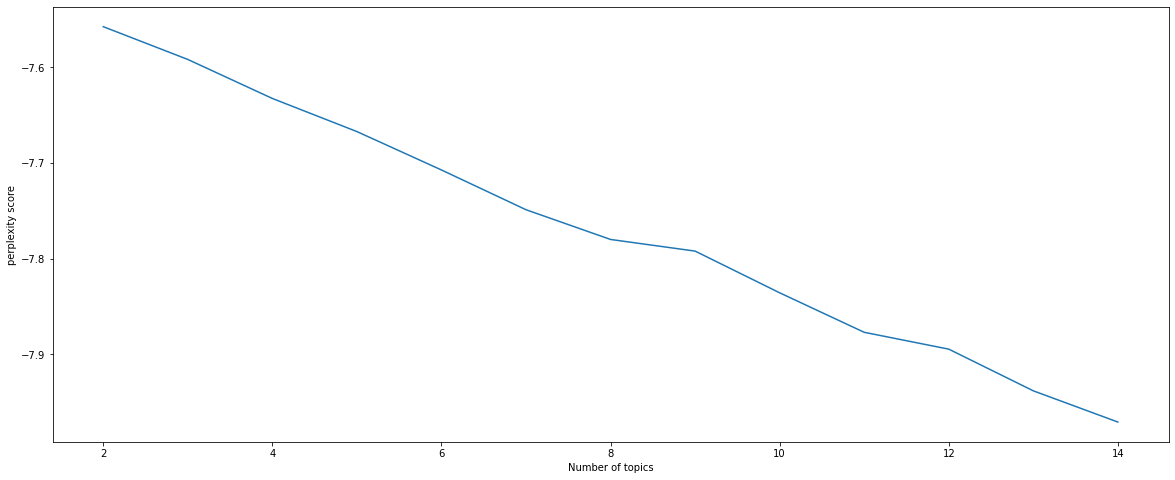

In [28]:
x = range(2, 15)
plt.plot(x, perplexity_values)
plt.xlabel('Number of topics')
plt.ylabel('perplexity score') # 혼잡도. 낮아야 좋음
#plt.figure(figsize=(20, 10))
plt.show()

In [29]:
coherence_values = []
for i in range(2, 15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
    coherence_model_lda = CoherenceModel(model = ldamodel, texts = texts, dictionary = dictionary, topn = 20)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

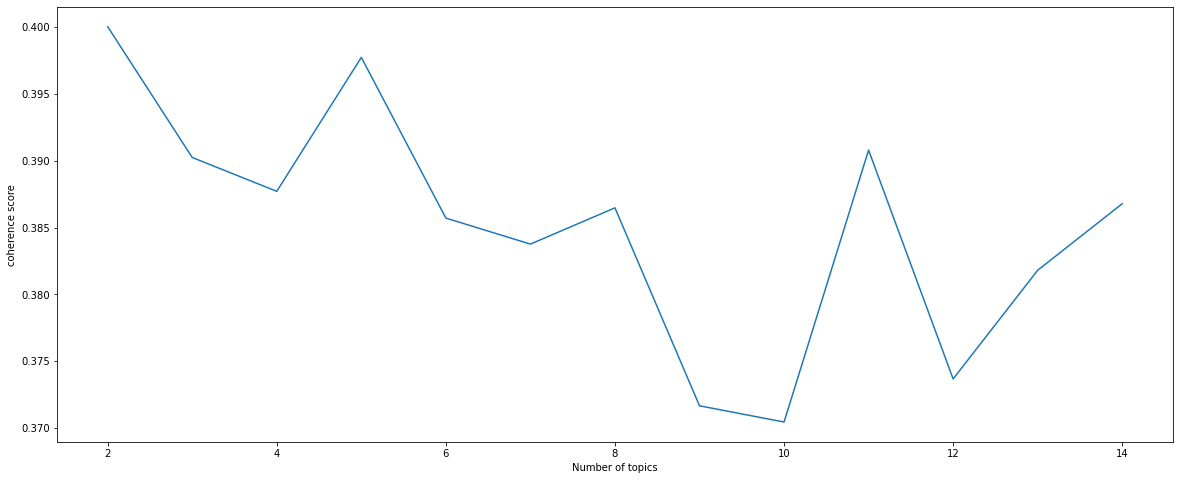

In [30]:
x = range(2, 15)
plt.plot(x, coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('coherence score') # 응집도. 높아야 좋음
plt.show()

## 06. 토픽모델링 결과 출력과 저장

### 1) 연도 구분 없이 돌리는 경우

In [40]:
lda = models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, random_state = 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
lda.print_topics(num_words=20)                        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.018*"urban" + 0.011*"ecosystem" + 0.011*"green" + 0.007*"climat" + 0.007*"flood" + 0.006*"infrastructur" + 0.006*"effect" + 0.006*"develop" + 0.005*"chang" + 0.005*"citi" + 0.005*"area" + 0.004*"risk" + 0.004*"water" + 0.004*"assess" + 0.004*"benefit" + 0.004*"environment" + 0.004*"approach" + 0.004*"potenti" + 0.003*"sustain" + 0.003*"ecolog"'),
 (1,
  '0.014*"urban" + 0.009*"chang" + 0.008*"ecosystem" + 0.007*"climat" + 0.006*"water" + 0.005*"area" + 0.005*"adapt" + 0.005*"green" + 0.005*"plan" + 0.005*"develop" + 0.005*"natur" + 0.004*"soil" + 0.004*"provid" + 0.004*"approach" + 0.004*"sustain" + 0.004*"differ" + 0.004*"ecolog" + 0.004*"benefit" + 0.004*"effect" + 0.004*"design"'),
 (2,
  '0.014*"urban" + 0.007*"sustain" + 0.006*"develop" + 0.006*"green" + 0.006*"ecosystem" + 0.006*"climat" + 0.005*"chang" + 0.005*"water" + 0.005*"effect" + 0.005*"citi" + 0.005*"soil" + 0.004*"approach" + 0.004*"area" + 0.004*"polici" + 0.004*"benefit" + 0.004*"cost" + 0.004*"plant" + 0.00

In [45]:
# txt 파일로 결과 저장
f = open('dtm_stop_0320_all.txt', 'w')

f.write('----- All -----')
f.write('\n')
f.write(str(lda.print_topics(num_words=20)))
    
f.close()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
# LDAvis 시각화 결과 저장
import pyLDAvis
import pyLDAvis.gensim_models

vis_data = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary)

pyLDAvis.save_html(vis_data, "dtm_stop_0320_all.html")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 2) 연도 구분 있는 경우

In [37]:
#num_topics에 원하는 토픽 수 넣기
ldaseq = ldaseqmodel.LdaSeqModel(corpus=corpus, id2word=dictionary, time_slice=time_slices, num_topics=5, random_state = 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\gensim\models\ldaseqmodel.py:293: RuntimeWarning: divide by zero encountered in double_scalars
  convergence = np.fabs((bound - old_bound) / old_bound)


In [38]:
ldaseq.print_topics(time=1)     #time=12는 2020년 263개 논문 기준.
#ldaseq.print_topic_times(topic=2)
#ldamodel.print_topics(num_words=20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('urban', 0.03987352090838856),
  ('green', 0.021582481664677026),
  ('area', 0.017892102663285548),
  ('citi', 0.012270563531540466),
  ('space', 0.009800239090405243),
  ('effect', 0.009031387706109348),
  ('infrastructur', 0.008866952054661552),
  ('flood', 0.007599903627928122),
  ('park', 0.006157116325473508),
  ('climat', 0.005793359881914136),
  ('tree', 0.0055118207582285465),
  ('chang', 0.0054792870307919525),
  ('differ', 0.005351378279911172),
  ('water', 0.0053105976205811796),
  ('air', 0.005056921401279804),
  ('ecosystem', 0.005014469725340738),
  ('roof', 0.005009730909806003),
  ('land', 0.004667278566908864),
  ('develop', 0.0046486362454088445),
  ('qualiti', 0.004573263831844119)],
 [('ecosystem', 0.012465738318037836),
  ('urban', 0.011537317020001301),
  ('sustain', 0.00855691263150137),
  ('develop', 0.0084385252659605),
  ('adapt', 0.008437056262480137),
  ('approach', 0.0080894970163638),
  ('climat', 0.007179158691446483),
  ('social', 0.006587230902022595

In [39]:
# txt 파일로 결과 저장
#ldaseq.get_document_topics(corpus)
from gensim.models import LdaSeqModel
from gensim.test.utils import datapath

temp_file = datapath("model")
ldaseq.save(temp_file)

ldaseq = LdaSeqModel.load(temp_file)

f = open('dtm_stop_0320_randomtest.txt', 'w')

for i in range(15):
    f.write('\n')
    f.write('----- Year:  -----')
    f.write('\n')
    f.write(str(ldaseq.print_topics(time=i)))
    
f.close()
# 이걸 출력해서 연도 붙인 게 'dtm_키워드비율.txt' 임.

#model = gensim.models.wrappers.ldaseqmodel.seqmodel2ldamodel(ldaseq)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
#pyLDAvis.display(vis)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
# LDAvis 시각화 저장
'''import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

#vis_data = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis_data = gensimvis.prepare(ldaseq, corpus, dictionary)

#pyLDAvis.save_html(vis_data, "tf_topic_model.html") 
pyLDAvis.save_html(vis_data, "dtm_try_0208.html")'''
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.wrappers.dtmmodel import DtmModel
#from gensim.models import DtmModel
from gensim.corpora import Dictionary, bleicorpus
import pyLDAvis

doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=0, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

pyLDAvis.save_html(vis_dtm, "dtm_2003_stop_0320.html")

doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=1, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

pyLDAvis.save_html(vis_dtm, "dtm_2006_stop_0320.html")

doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=2, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

pyLDAvis.save_html(vis_dtm, "dtm_2007_stop_0320.html")

doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=3, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

pyLDAvis.save_html(vis_dtm, "dtm_2009_stop_0320.html")

doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=4, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

pyLDAvis.save_html(vis_dtm, "dtm_2010_stop_0320.html")



doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=10, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

pyLDAvis.save_html(vis_dtm, "dtm_2012_stop_0320.html")

doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=11, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

pyLDAvis.save_html(vis_dtm, "dtm_2014_stop_0320.html")

doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=12, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

pyLDAvis.save_html(vis_dtm, "dtm_2015_stop_0320.html")

doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=13, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

pyLDAvis.save_html(vis_dtm, "dtm_2016_stop_0320.html")

doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=14, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

pyLDAvis.save_html(vis_dtm, "dtm_2017_stop_0320.html")



doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=10, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

pyLDAvis.save_html(vis_dtm, "dtm_2018_stop_0320.html")

doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=11, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

pyLDAvis.save_html(vis_dtm, "dtm_2019_stop_0320.html")

doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=12, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

pyLDAvis.save_html(vis_dtm, "dtm_2020_stop_0320.html")

doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=13, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

pyLDAvis.save_html(vis_dtm, "dtm_2021_stop_0320.html")

doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=14, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

pyLDAvis.save_html(vis_dtm, "dtm_2022_stop_0320.html")

# 저장된 파일 설명

# DTM_stop_10 폴더 -> 아래의 8개 목록에 urban과 adapt까지 추가하여 10개를 불용어 처리한 파일들 담김.
# dtm_year_stop_8.html -> 8개 단어 불용어 처리(management, climate, model, use, develop, plan, increase, service)
# DTM_stop_18 폴더 -> 8개 단어 불용어 처리한 것 담김.
# dtm_year_stop_(날짜).html -> (날짜)에 해당하는 불용어 반영한 결과 담김.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
